# The plots of performing an experiment with the original variant of AlexNet

The following plots are obtained from running an experiment with the original variant of AlexNet.

In [1]:
# from original_variant_AlexNet_experiment import original_variant_alexnet

# original_variant_alexnet(parent_folder = 'Original Variant of Alexnet_New Results', number_simulation = 10, number_PCA_component = 20, num_sample_artiphysiology = 1000)

## Importing the required dependencies

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os.path as osp
import pandas as pd
import pingouin as pg
import scipy.io
import seaborn as sns

from matplotlib.colors import ListedColormap
from scipy import stats
from sklearn.decomposition import PCA

C:\Users\Aslan\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## Setting the initial parameters of the original variant of AlexNet

The following parameters of the plotting must be set beforehand:

- number_simulation: the number of simulations of the whole experiment.
- number_group: the number of groups of stimuli which in our dataset is always four.
- number_layer: the number of convolutional layers of our deep neural network which is equal to five.
- number_layer_freeze: the number of frozen layers which is equal to the number of convolutional layers of our deep neural network plus one referring to the network without any frozen layer.
- number_PCA_component: the number of PCA components calculated for activations per convolutional layer of our deep neural network.
- parent_folder: the folder having all the saved results. 

In [3]:
number_simulation = 10
number_group = 4
number_layer = 5
number_layer_freeze = 6
number_PCA_component = 20

parent_folder = osp.dirname(osp.abspath("./")) + '/data/results/10 Simulations of Original Variant of AlexNet'

## Loading the main variables

In [4]:
all_simulation_training_accuracy = scipy.io.loadmat(parent_folder + '/all_simulation_training_accuracy.mat')['all_simulation_training_accuracy']
all_simulation_transfer_accuracy = scipy.io.loadmat(parent_folder + '/all_simulation_transfer_accuracy.mat')['all_simulation_transfer_accuracy']
all_simulation_all_MI_original = scipy.io.loadmat(parent_folder + '/all_simulation_all_MI_original.mat')['all_simulation_all_MI_original']
all_simulation_all_MI_noise = scipy.io.loadmat(parent_folder + '/all_simulation_all_MI_noise.mat')['all_simulation_all_MI_noise']
all_simulation_all_ID = scipy.io.loadmat(parent_folder + '/all_simulation_all_ID.mat')['all_simulation_all_ID']
all_x_sample_ID = scipy.io.loadmat(parent_folder + '/all_x_sample_ID.mat')['all_x_sample_ID']
    
all_simulation_training_accuracy_permuted = scipy.io.loadmat(parent_folder + '/all_simulation_training_accuracy_permuted.mat')['all_simulation_training_accuracy_permuted']
all_simulation_all_ID_permuted = scipy.io.loadmat(parent_folder + '/all_simulation_all_ID_permuted.mat')['all_simulation_all_ID_permuted']
    
all_PCA_explained_variance_layer_1 = scipy.io.loadmat(parent_folder + '/all_PCA_explained_variance_layer_1.mat')['all_PCA_explained_variance_layer_1']
all_PCA_explained_variance_layer_2 = scipy.io.loadmat(parent_folder + '/all_PCA_explained_variance_layer_2.mat')['all_PCA_explained_variance_layer_2']
all_PCA_explained_variance_layer_3 = scipy.io.loadmat(parent_folder + '/all_PCA_explained_variance_layer_3.mat')['all_PCA_explained_variance_layer_3']
all_PCA_explained_variance_layer_4 = scipy.io.loadmat(parent_folder + '/all_PCA_explained_variance_layer_4.mat')['all_PCA_explained_variance_layer_4']
all_PCA_explained_variance_layer_5 = scipy.io.loadmat(parent_folder + '/all_PCA_explained_variance_layer_5.mat')['all_PCA_explained_variance_layer_5']
    
all_simulation_weight_change_layer_1 = scipy.io.loadmat(parent_folder + '/all_simulation_weight_change_layer_1.mat')['all_simulation_weight_change_layer_1']
all_simulation_weight_change_layer_2 = scipy.io.loadmat(parent_folder + '/all_simulation_weight_change_layer_2.mat')['all_simulation_weight_change_layer_2']
all_simulation_weight_change_layer_3 = scipy.io.loadmat(parent_folder + '/all_simulation_weight_change_layer_3.mat')['all_simulation_weight_change_layer_3']
all_simulation_weight_change_layer_4 = scipy.io.loadmat(parent_folder + '/all_simulation_weight_change_layer_4.mat')['all_simulation_weight_change_layer_4']
all_simulation_weight_change_layer_5 = scipy.io.loadmat(parent_folder + '/all_simulation_weight_change_layer_5.mat')['all_simulation_weight_change_layer_5']
    
all_simulation_layer_rotation_layer_1 = scipy.io.loadmat(parent_folder + '/all_simulation_layer_rotation_layer_1.mat')['all_simulation_layer_rotation_layer_1']
all_simulation_layer_rotation_layer_2 = scipy.io.loadmat(parent_folder + '/all_simulation_layer_rotation_layer_2.mat')['all_simulation_layer_rotation_layer_2']
all_simulation_layer_rotation_layer_3 = scipy.io.loadmat(parent_folder + '/all_simulation_layer_rotation_layer_3.mat')['all_simulation_layer_rotation_layer_3']
all_simulation_layer_rotation_layer_4 = scipy.io.loadmat(parent_folder + '/all_simulation_layer_rotation_layer_4.mat')['all_simulation_layer_rotation_layer_4']
all_simulation_layer_rotation_layer_5 = scipy.io.loadmat(parent_folder + '/all_simulation_layer_rotation_layer_5.mat')['all_simulation_layer_rotation_layer_5']

## Training accuracy with correct labels

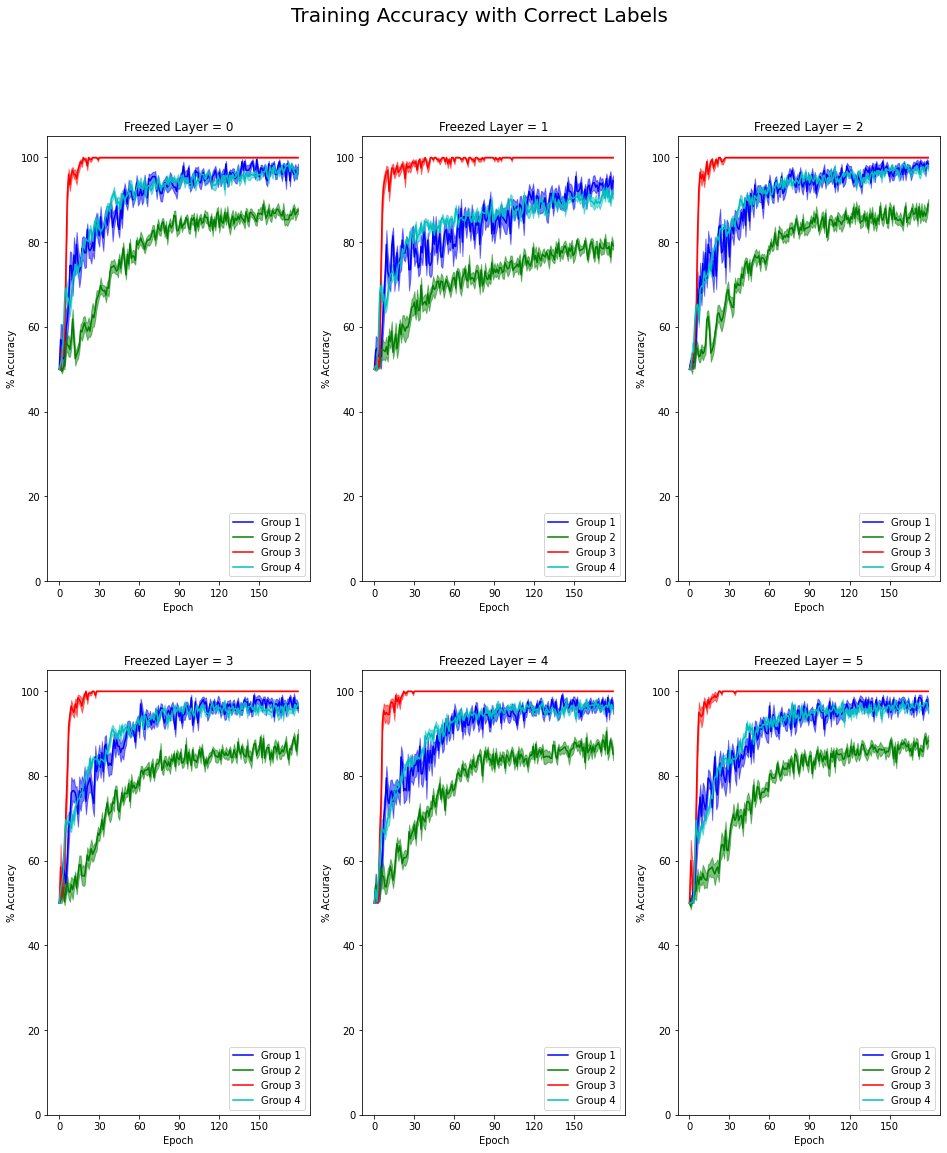

In [5]:
fig, axs = plt.subplots(2, 3, figsize = (2 * 8, 3 * 6))
fig.suptitle('Training Accuracy with Correct Labels', fontsize = 20)

for i in range(number_layer_freeze):
    if i <= 2:
        ax = axs[0, i]
    elif i > 2:
        ax = axs[1, i - 3]
    
    ax.set_title('Freezed Layer = ' + str(i), fontsize = 12)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('% Accuracy')
                
    ax.plot(range(0, 180), all_simulation_training_accuracy.mean(0)[0, i], "-b", label = "Group 1")
    ax.fill_between(range(0, 180), all_simulation_training_accuracy.mean(0)[0, i] - all_simulation_training_accuracy.std(0)[0, i] / number_simulation ** 0.5, all_simulation_training_accuracy.mean(0)[0, i] + all_simulation_training_accuracy.std(0)[0, i] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'b', facecolor = 'b')
    
    ax.plot(range(0, 180), all_simulation_training_accuracy.mean(0)[1, i], "-g", label = "Group 2")
    ax.fill_between(range(0, 180), all_simulation_training_accuracy.mean(0)[1, i] - all_simulation_training_accuracy.std(0)[1, i] / number_simulation ** 0.5, all_simulation_training_accuracy.mean(0)[1, i] + all_simulation_training_accuracy.std(0)[1, i] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'g', facecolor = 'g')
    
    ax.plot(range(0, 180), all_simulation_training_accuracy.mean(0)[2, i], "-r", label = "Group 3")
    ax.fill_between(range(0, 180), all_simulation_training_accuracy.mean(0)[2, i] - all_simulation_training_accuracy.std(0)[2, i] / number_simulation ** 0.5, all_simulation_training_accuracy.mean(0)[2, i] + all_simulation_training_accuracy.std(0)[2, i] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'r', facecolor = 'r')
    
    ax.plot(range(0, 180), all_simulation_training_accuracy.mean(0)[3, i], "-c", label = "Group 4")
    ax.fill_between(range(0, 180), all_simulation_training_accuracy.mean(0)[3, i] - all_simulation_training_accuracy.std(0)[3, i] / number_simulation ** 0.5, all_simulation_training_accuracy.mean(0)[3, i] + all_simulation_training_accuracy.std(0)[3, i] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'c', facecolor = 'c')
               
    ax.legend(loc = 'lower right', fontsize = 'medium')
    ax.set_ylim((0, 105))
    ax.set_xticks(np.arange(0, 180, 30.0))

## Training accuracy with permuted labels

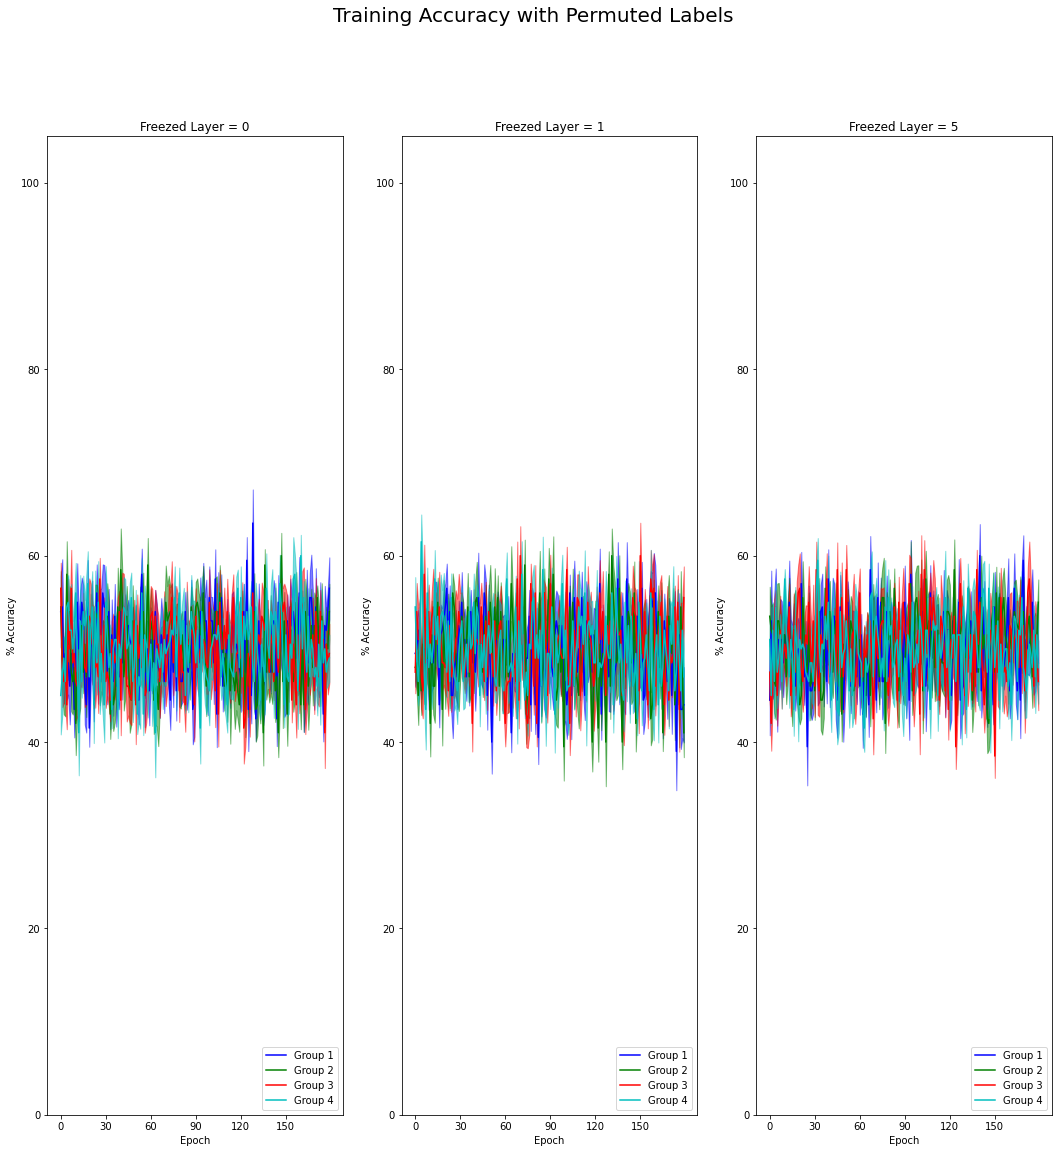

In [6]:
fig, axs = plt.subplots(1, 3, figsize = (1 * 18, 3 * 6))
fig.suptitle('Training Accuracy with Permuted Labels', fontsize = 20)

for i in [0, 1, 5]:
    if i == 0:
        ax = axs[0]
    elif i == 1:
        ax = axs[1]
    elif i == 5:
        ax = axs[2]
    
    ax.set_title('Freezed Layer = ' + str(i), fontsize = 12)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('% Accuracy')
                
    ax.plot(range(0, 180), all_simulation_training_accuracy_permuted.mean(0)[0, i], "-b", label = "Group 1")
    ax.fill_between(range(0, 180), all_simulation_training_accuracy_permuted.mean(0)[0, i] - all_simulation_training_accuracy_permuted.std(0)[0, i] / number_simulation ** 0.5, all_simulation_training_accuracy_permuted.mean(0)[0, i] + all_simulation_training_accuracy_permuted.std(0)[0, i] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'b', facecolor = 'b')
    
    ax.plot(range(0, 180), all_simulation_training_accuracy_permuted.mean(0)[1, i], "-g", label = "Group 2")
    ax.fill_between(range(0, 180), all_simulation_training_accuracy_permuted.mean(0)[1, i] - all_simulation_training_accuracy_permuted.std(0)[1, i] / number_simulation ** 0.5, all_simulation_training_accuracy_permuted.mean(0)[1, i] + all_simulation_training_accuracy_permuted.std(0)[1, i] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'g', facecolor = 'g')
    
    ax.plot(range(0, 180), all_simulation_training_accuracy_permuted.mean(0)[2, i], "-r", label = "Group 3")
    ax.fill_between(range(0, 180), all_simulation_training_accuracy_permuted.mean(0)[2, i] - all_simulation_training_accuracy_permuted.std(0)[2, i] / number_simulation ** 0.5, all_simulation_training_accuracy_permuted.mean(0)[2, i] + all_simulation_training_accuracy_permuted.std(0)[2, i] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'r', facecolor = 'r')
    
    ax.plot(range(0, 180), all_simulation_training_accuracy_permuted.mean(0)[3, i], "-c", label = "Group 4")
    ax.fill_between(range(0, 180), all_simulation_training_accuracy_permuted.mean(0)[3, i] - all_simulation_training_accuracy_permuted.std(0)[3, i] / number_simulation ** 0.5, all_simulation_training_accuracy_permuted.mean(0)[3, i] + all_simulation_training_accuracy_permuted.std(0)[3, i] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'c', facecolor = 'c')
               
    ax.legend(loc = 'lower right', fontsize = 'medium')
    ax.set_ylim((0, 105))
    ax.set_xticks(np.arange(0, 180, 30.0))

## Transfer accuracy

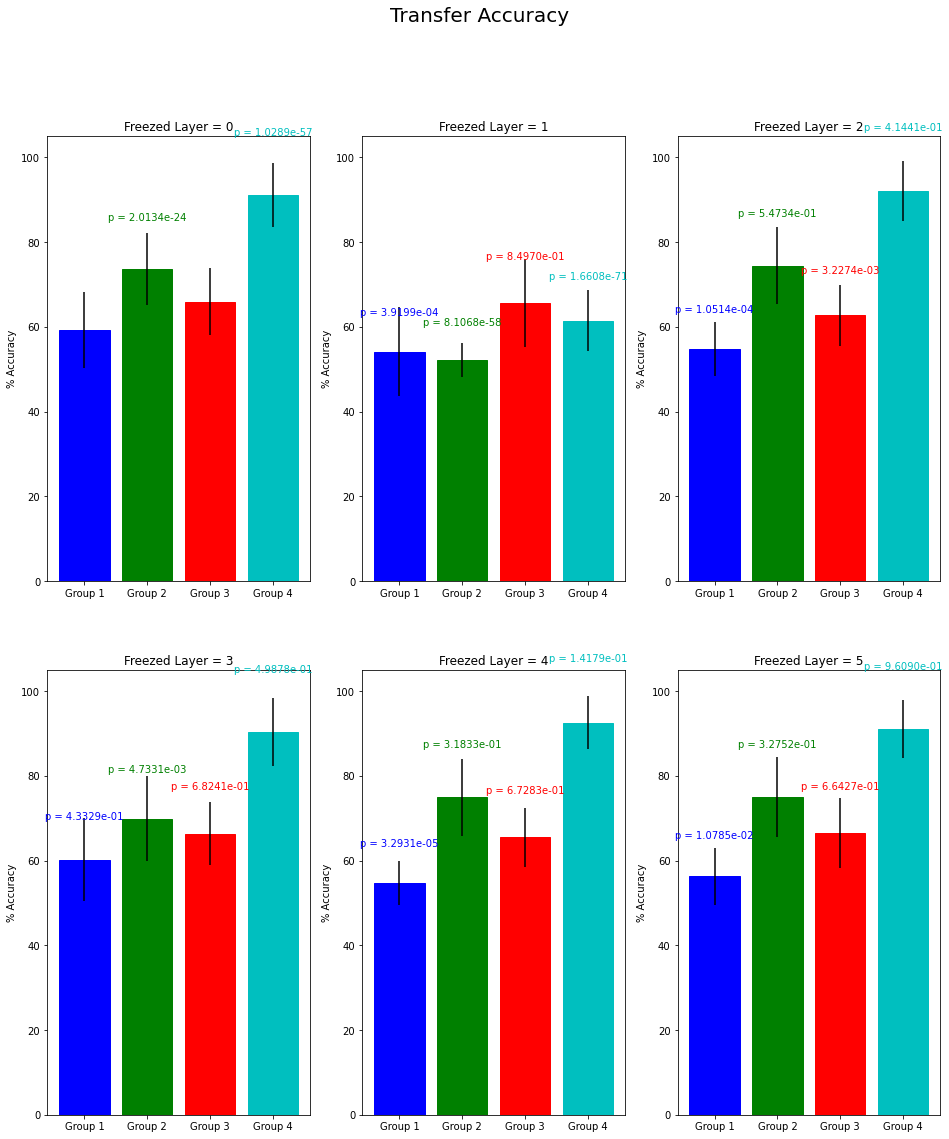

In [7]:
fig, axs = plt.subplots(2, 3, figsize = (2 * 8, 3 * 6))
fig.suptitle('Transfer Accuracy', fontsize = 20)

for i in range(number_layer_freeze):
    if i <= 2:
        ax = axs[0, i]
    elif i > 2:
        ax = axs[1, i - 3]
    
    ax.set_title('Freezed Layer = ' + str(i), fontsize = 12)
    ax.set_ylabel('% Accuracy')
    
    bar_list = ax.bar(range(0, number_group), [all_simulation_transfer_accuracy.mean(axis = (0, 3))[0, i], 
                                    all_simulation_transfer_accuracy.mean(axis = (0, 3))[1, i], 
                                    all_simulation_transfer_accuracy.mean(axis = (0, 3))[2, i], 
                                    all_simulation_transfer_accuracy.mean(axis = (0, 3))[3, i]],
                      yerr = [all_simulation_transfer_accuracy.std(axis = (0, 3))[0, i],
                              all_simulation_transfer_accuracy.std(axis = (0, 3))[1, i],
                              all_simulation_transfer_accuracy.std(axis = (0, 3))[2, i],
                              all_simulation_transfer_accuracy.std(axis = (0, 3))[3, i]])
    
    bar_list[0].set_color('b')
    bar_list[1].set_color('g')
    bar_list[2].set_color('r')
    bar_list[3].set_color('c')
    
    ax.set_ylim((0, 105))
    ax.set_xticks(range(0, number_group))
    ax.set_xticklabels(['Group 1', 'Group 2', 'Group 3', 'Group 4'])
    
    if i == 0:
        t_stat_1, p_value_1 = stats.ttest_ind(all_simulation_transfer_accuracy[:, 0, 0, :].flatten(), all_simulation_transfer_accuracy[:, 1, 0, :].flatten(), equal_var = True, nan_policy = 'omit')
        t_stat_2, p_value_2 = stats.ttest_ind(all_simulation_transfer_accuracy[:, 2, 0, :].flatten(), all_simulation_transfer_accuracy[:, 3, 0, :].flatten(), equal_var = True, nan_policy = 'omit')
        
        ax.text(bar_list[1].get_x() + bar_list[1].get_width() * 0.5, 1.15 * bar_list[1].get_height(), 'p = {:.4e}'.format(p_value_1), ha = 'center', va = 'bottom', color = 'g')
        ax.text(bar_list[3].get_x() + bar_list[3].get_width() * 0.5, 1.15 * bar_list[3].get_height(), 'p = {:.4e}'.format(p_value_2), ha = 'center', va = 'bottom', color = 'c')
        
    elif i != 0:
        t_stat_1, p_value_1 = stats.ttest_ind(all_simulation_transfer_accuracy[:, 0, 0, :].flatten(), all_simulation_transfer_accuracy[:, 0, i, :].flatten(), equal_var = True, nan_policy = 'omit')
        t_stat_2, p_value_2 = stats.ttest_ind(all_simulation_transfer_accuracy[:, 1, 0, :].flatten(), all_simulation_transfer_accuracy[:, 1, i, :].flatten(), equal_var = True, nan_policy = 'omit')
        t_stat_3, p_value_3 = stats.ttest_ind(all_simulation_transfer_accuracy[:, 2, 0, :].flatten(), all_simulation_transfer_accuracy[:, 2, i, :].flatten(), equal_var = True, nan_policy = 'omit')
        t_stat_4, p_value_4 = stats.ttest_ind(all_simulation_transfer_accuracy[:, 3, 0, :].flatten(), all_simulation_transfer_accuracy[:, 3, i, :].flatten(), equal_var = True, nan_policy = 'omit')
        
        ax.text(bar_list[0].get_x() + bar_list[0].get_width() * 0.5, 1.15 * bar_list[0].get_height(), 'p = {:.4e}'.format(p_value_1), ha = 'center', va = 'bottom', color = 'b')
        ax.text(bar_list[1].get_x() + bar_list[1].get_width() * 0.5, 1.15 * bar_list[1].get_height(), 'p = {:.4e}'.format(p_value_2), ha = 'center', va = 'bottom', color = 'g')
        ax.text(bar_list[2].get_x() + bar_list[2].get_width() * 0.5, 1.15 * bar_list[2].get_height(), 'p = {:.4e}'.format(p_value_3), ha = 'center', va = 'bottom', color = 'r')
        ax.text(bar_list[3].get_x() + bar_list[3].get_width() * 0.5, 1.15 * bar_list[3].get_height(), 'p = {:.4e}'.format(p_value_4), ha = 'center', va = 'bottom', color = 'c')

## Performing PCA on the activations of layers to calculate the explained variance

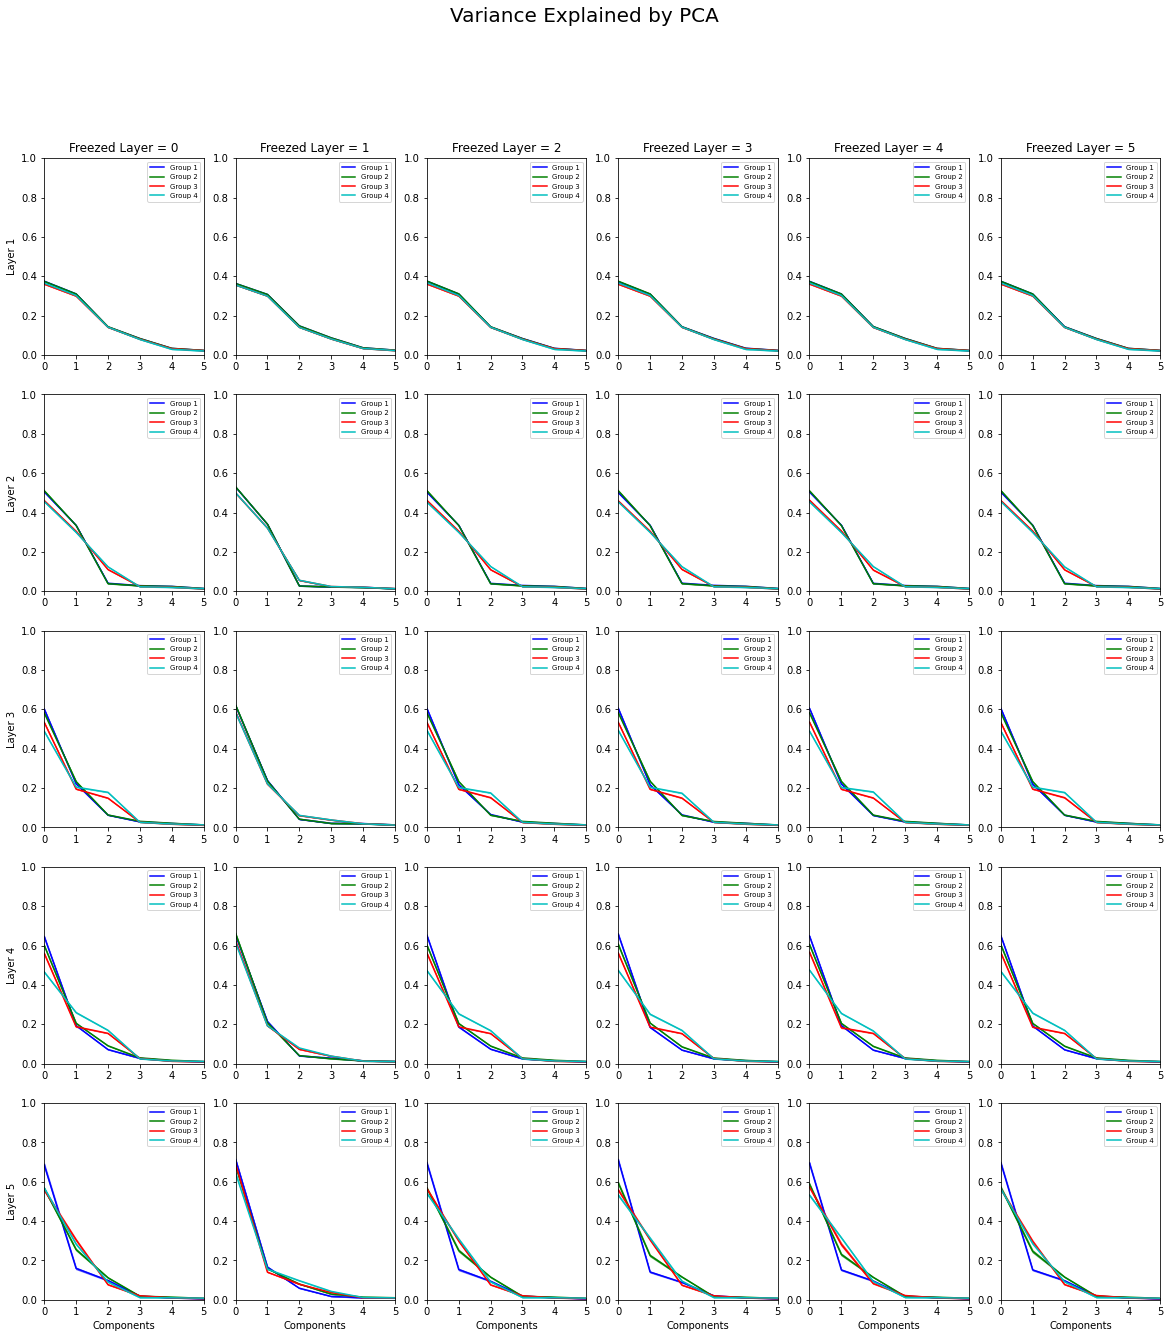

In [8]:
fig, axs = plt.subplots(number_layer, number_layer_freeze, figsize = (number_layer * 4, number_layer_freeze * 3.5))
fig.suptitle('Variance Explained by PCA', fontsize = 20)

for i in range(number_layer):
    for j in range(number_layer_freeze):
        ax = axs[i, j]
        
        if i == 0:
            ax.set_title('Freezed Layer = ' + str(j))
        elif i == 4:
            ax.set_xlabel('Components')
        if j == 0:
            ax.set_ylabel('Layer ' + str(i + 1))
            
        variable_name = 'all_PCA_explained_variance_layer_' + str(i + 1)    
        PCA_explained_variance = vars()[variable_name]
                    
        ax.plot(range(0, number_PCA_component), PCA_explained_variance.mean(0)[0, j], "-b", label = "Group 1")
        ax.fill_between(range(0, number_PCA_component), PCA_explained_variance.mean(0)[0, j] - PCA_explained_variance.std(0)[0, j] / number_simulation ** 0.5, PCA_explained_variance.mean(0)[0, j] + PCA_explained_variance.std(0)[0, j] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'b', facecolor = 'b')
        
        ax.plot(range(0, number_PCA_component), PCA_explained_variance.mean(0)[1, j], "-g", label = "Group 2")
        ax.fill_between(range(0, number_PCA_component), PCA_explained_variance.mean(0)[1, j] - PCA_explained_variance.std(0)[1, j] / number_simulation ** 0.5, PCA_explained_variance.mean(0)[1, j] + PCA_explained_variance.std(0)[1, j] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'g', facecolor = 'g')
                    
        ax.plot(range(0, number_PCA_component), PCA_explained_variance.mean(0)[2, j], "-r", label = "Group 3")
        ax.fill_between(range(0, number_PCA_component), PCA_explained_variance.mean(0)[2, j] - PCA_explained_variance.std(0)[2, j] / number_simulation ** 0.5, PCA_explained_variance.mean(0)[2, j] + PCA_explained_variance.std(0)[2, j] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'r', facecolor = 'r')
        
        ax.plot(range(0, number_PCA_component), PCA_explained_variance.mean(0)[3, j], "-c", label = "Group 4")
        ax.fill_between(range(0, number_PCA_component), PCA_explained_variance.mean(0)[3, j] - PCA_explained_variance.std(0)[3, j] / number_simulation ** 0.5, PCA_explained_variance.mean(0)[3, j] + PCA_explained_variance.std(0)[3, j] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'c', facecolor = 'c')
                                            
        ax.legend(loc = 'upper right', fontsize = 'x-small')
        ax.set_ylim((0, 1))
        ax.set_xlim((0, 5))

## Relative weight change

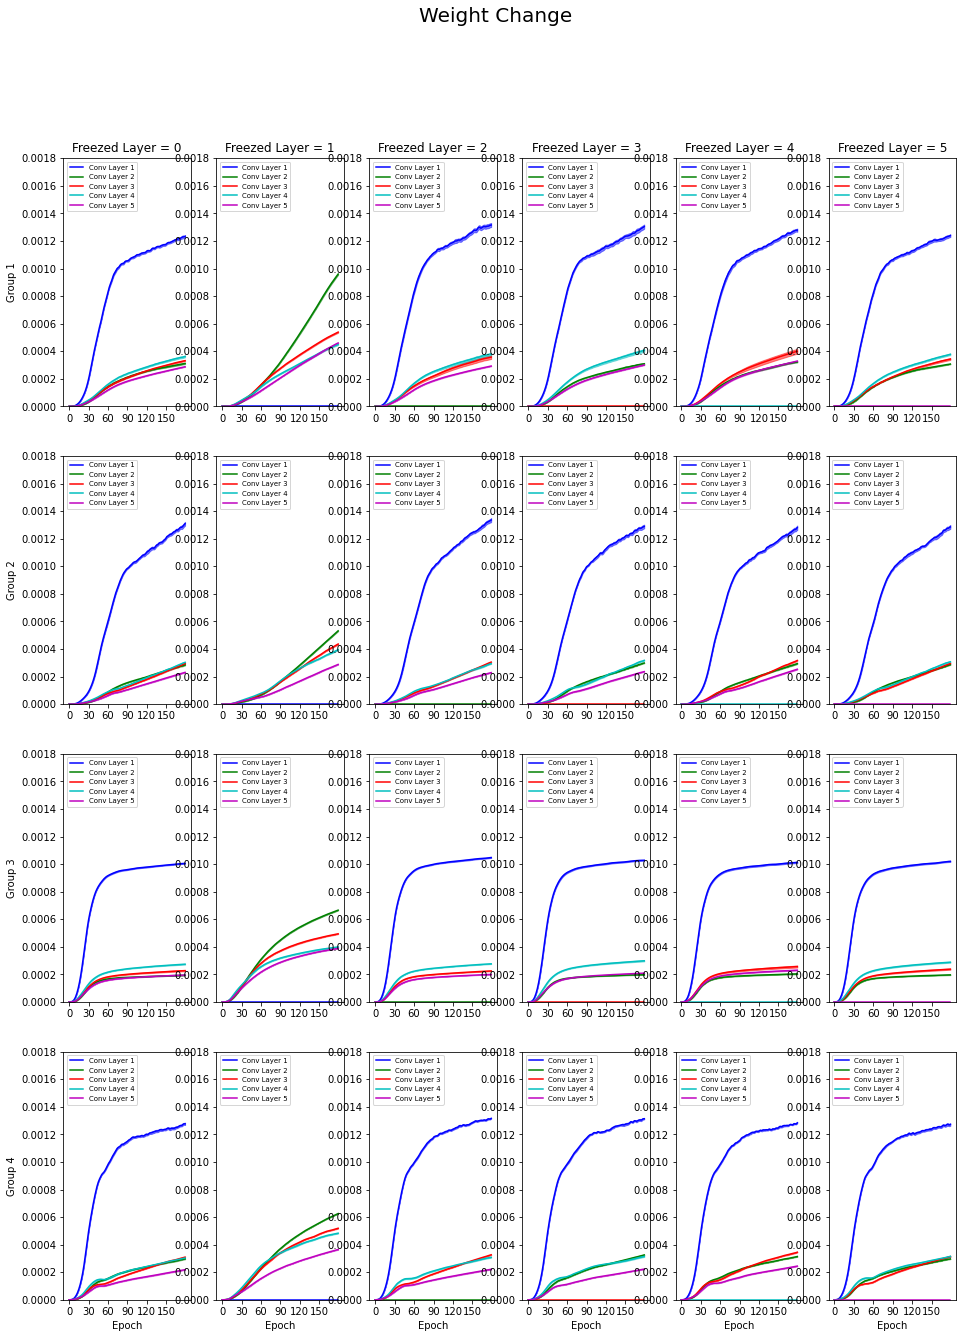

In [9]:
fig, axs = plt.subplots(number_group, number_layer_freeze, figsize = (number_group * 4, number_layer_freeze * 3.5))
fig.suptitle('Weight Change', fontsize = 20)

for i in range(number_group):
    for j in range(number_layer_freeze):
        ax = axs[i, j]
        
        if i == 0:
            ax.set_title('Freezed Layer = ' + str(j))
        if i == 3:
            ax.set_xlabel('Epoch')
        if j == 0:
            ax.set_ylabel('Group ' + str(i + 1))
                    
        ax.plot(range(0, 180), all_simulation_weight_change_layer_1.mean(0)[i, j], "-b", label = "Conv Layer 1")
        ax.fill_between(range(0, 180), all_simulation_weight_change_layer_1.mean(0)[i, j] - all_simulation_weight_change_layer_1.std(0)[i, j] / number_simulation ** 0.5, all_simulation_weight_change_layer_1.mean(0)[i, j] + all_simulation_weight_change_layer_1.std(0)[i, j] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'b', facecolor = 'b')
        
        ax.plot(range(0, 180), all_simulation_weight_change_layer_2.mean(0)[i, j], "-g", label = "Conv Layer 2")
        ax.fill_between(range(0, 180), all_simulation_weight_change_layer_2.mean(0)[i, j] - all_simulation_weight_change_layer_2.std(0)[i, j] / number_simulation ** 0.5, all_simulation_weight_change_layer_2.mean(0)[i, j] + all_simulation_weight_change_layer_2.std(0)[i, j] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'g', facecolor = 'g')
                    
        ax.plot(range(0, 180), all_simulation_weight_change_layer_3.mean(0)[i, j], "-r", label = "Conv Layer 3")
        ax.fill_between(range(0, 180), all_simulation_weight_change_layer_3.mean(0)[i, j] - all_simulation_weight_change_layer_3.std(0)[i, j] / number_simulation ** 0.5, all_simulation_weight_change_layer_3.mean(0)[i, j] + all_simulation_weight_change_layer_3.std(0)[i, j] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'r', facecolor = 'r')
        
        ax.plot(range(0, 180), all_simulation_weight_change_layer_4.mean(0)[i, j], "-c", label = "Conv Layer 4")
        ax.fill_between(range(0, 180), all_simulation_weight_change_layer_4.mean(0)[i, j] - all_simulation_weight_change_layer_4.std(0)[i, j] / number_simulation ** 0.5, all_simulation_weight_change_layer_4.mean(0)[i, j] + all_simulation_weight_change_layer_4.std(0)[i, j] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'c', facecolor = 'c')
                    
        ax.plot(range(0, 180), all_simulation_weight_change_layer_5.mean(0)[i, j], "-m", label = "Conv Layer 5")
        ax.fill_between(range(0, 180), all_simulation_weight_change_layer_5.mean(0)[i, j] - all_simulation_weight_change_layer_5.std(0)[i, j] / number_simulation ** 0.5, all_simulation_weight_change_layer_5.mean(0)[i, j] + all_simulation_weight_change_layer_5.std(0)[i, j] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'm', facecolor = 'm')
                    
        ax.legend(loc = 'upper left', fontsize = 'x-small')
        ax.set_ylim((0, 0.0018))
        ax.set_xticks(np.arange(0, 180, 30.0))

# From the following paper:
## Carbonnelle, S., & De Vleeschouwer, C. (2019). Layer rotation: a surprisingly powerful indicator of generalization in deep networks?. International Conference of Machine Learning.

## Layer rotation

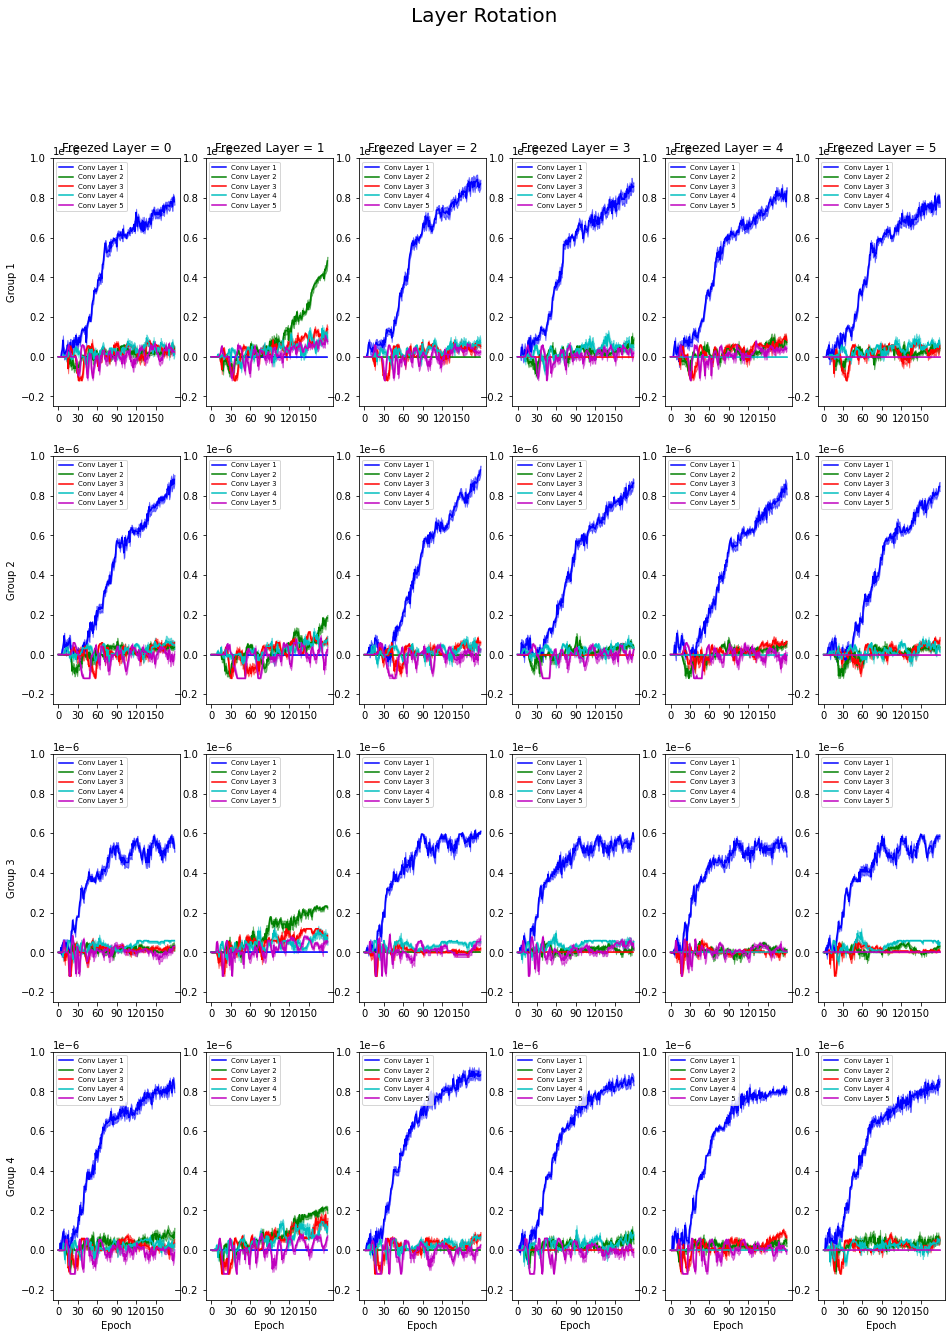

In [10]:
fig, axs = plt.subplots(number_group, number_layer_freeze, figsize = (number_group * 4, number_layer_freeze * 3.5))
fig.suptitle('Layer Rotation', fontsize = 20)

for i in range(number_group):
    for j in range(number_layer_freeze):
        ax = axs[i, j]
        
        if i == 0:
            ax.set_title('Freezed Layer = ' + str(j))
        if i == 3:
            ax.set_xlabel('Epoch')
        if j == 0:
            ax.set_ylabel('Group ' + str(i + 1))
                    
        ax.plot(range(0, 180), all_simulation_layer_rotation_layer_1.mean(0)[i, j], "-b", label = "Conv Layer 1")
        ax.fill_between(range(0, 180), all_simulation_layer_rotation_layer_1.mean(0)[i, j] - all_simulation_layer_rotation_layer_1.std(0)[i, j] / number_simulation ** 0.5, all_simulation_layer_rotation_layer_1.mean(0)[i, j] + all_simulation_layer_rotation_layer_1.std(0)[i, j] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'b', facecolor = 'b')
        
        ax.plot(range(0, 180), all_simulation_layer_rotation_layer_2.mean(0)[i, j], "-g", label = "Conv Layer 2")
        ax.fill_between(range(0, 180), all_simulation_layer_rotation_layer_2.mean(0)[i, j] - all_simulation_layer_rotation_layer_2.std(0)[i, j] / number_simulation ** 0.5, all_simulation_layer_rotation_layer_2.mean(0)[i, j] + all_simulation_layer_rotation_layer_2.std(0)[i, j] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'g', facecolor = 'g')
                    
        ax.plot(range(0, 180), all_simulation_layer_rotation_layer_3.mean(0)[i, j], "-r", label = "Conv Layer 3")
        ax.fill_between(range(0, 180), all_simulation_layer_rotation_layer_3.mean(0)[i, j] - all_simulation_layer_rotation_layer_3.std(0)[i, j] / number_simulation ** 0.5, all_simulation_layer_rotation_layer_3.mean(0)[i, j] + all_simulation_layer_rotation_layer_3.std(0)[i, j] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'r', facecolor = 'r')
        
        ax.plot(range(0, 180), all_simulation_layer_rotation_layer_4.mean(0)[i, j], "-c", label = "Conv Layer 4")
        ax.fill_between(range(0, 180), all_simulation_layer_rotation_layer_4.mean(0)[i, j] - all_simulation_layer_rotation_layer_4.std(0)[i, j] / number_simulation ** 0.5, all_simulation_layer_rotation_layer_4.mean(0)[i, j] + all_simulation_layer_rotation_layer_4.std(0)[i, j] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'c', facecolor = 'c')
                    
        ax.plot(range(0, 180), all_simulation_layer_rotation_layer_5.mean(0)[i, j], "-m", label = "Conv Layer 5")
        ax.fill_between(range(0, 180), all_simulation_layer_rotation_layer_5.mean(0)[i, j] - all_simulation_layer_rotation_layer_5.std(0)[i, j] / number_simulation ** 0.5, all_simulation_layer_rotation_layer_5.mean(0)[i, j] + all_simulation_layer_rotation_layer_5.std(0)[i, j] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'm', facecolor = 'm')
                    
        ax.legend(loc = 'upper left', fontsize = 'x-small')
        ax.set_ylim((-2.5 * 10 ** (-7), 10 * 10 ** (-7)))
        ax.set_xticks(np.arange(0, 180, 30.0))

# From the following paper:
## Achille, A., & Soatto, S. (2018). Emergence of Invariance and Disentanglement in Deep Representations. Journal of Machine Learning Research, 18, 1–34.

## Mutual information between the original stimuli and activities of layers

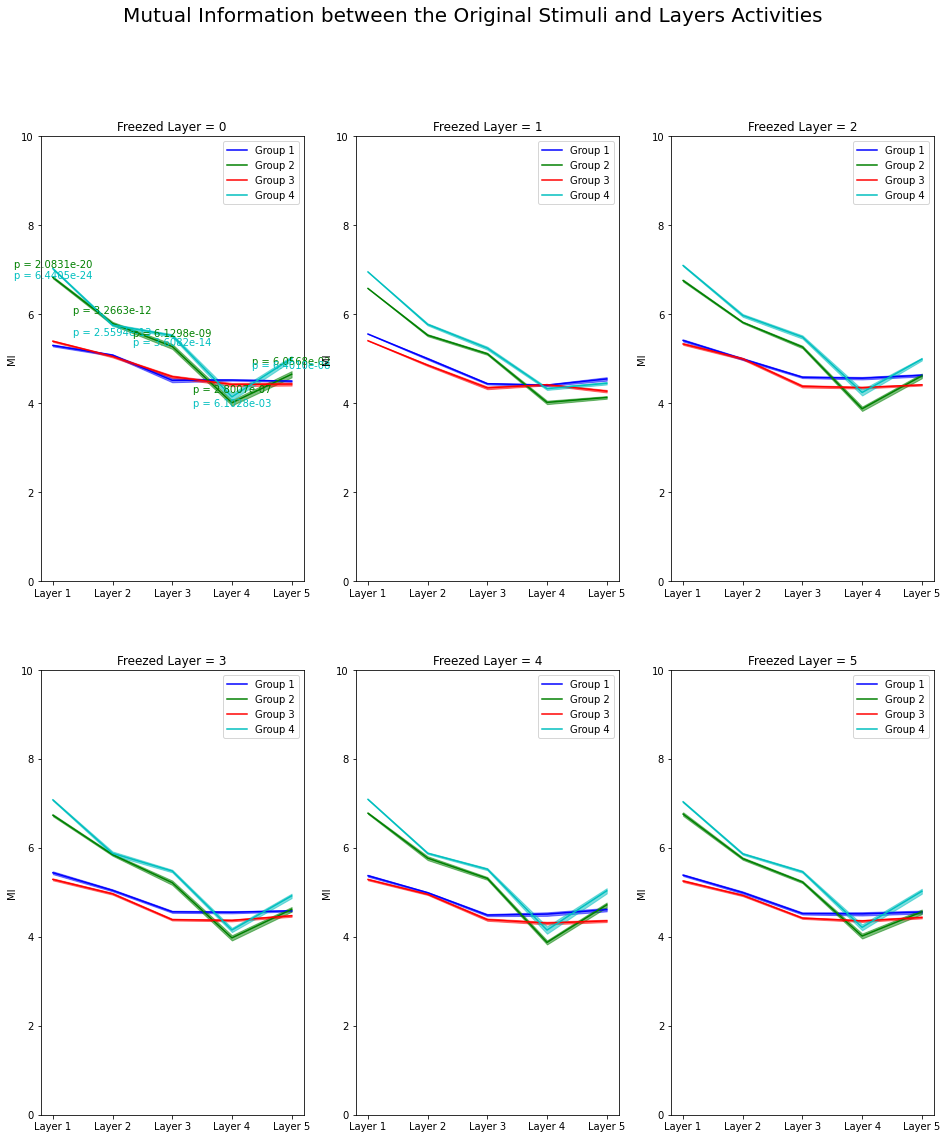

In [11]:
fig, axs = plt.subplots(2, 3, figsize = (2 * 8, 3 * 6))
fig.suptitle('Mutual Information between the Original Stimuli and Layers Activities', fontsize = 20)

for i in range(number_layer_freeze):
    if i <= 2:
        ax = axs[0, i]
    elif i > 2:
        ax = axs[1, i - 3]
    
    ax.set_title('Freezed Layer = ' + str(i), fontsize = 12)
    ax.set_ylabel('MI')
    
    ax.plot(range(0, number_layer), np.nanmean(all_simulation_all_MI_original, axis = 0)[0, :, i], "-b", label = "Group 1")
    ax.fill_between(range(0, number_layer), np.nanmean(all_simulation_all_MI_original, axis = 0)[0, :, i] - np.nanstd(all_simulation_all_MI_original, axis = 0)[0, :, i] / number_simulation ** 0.5, np.nanmean(all_simulation_all_MI_original, axis = 0)[0, :, i] + np.nanstd(all_simulation_all_MI_original, axis = 0)[0, :, i] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'b', facecolor = 'b')
    
    ax.plot(range(0, number_layer), np.nanmean(all_simulation_all_MI_original, axis = 0)[1, :, i], "-g", label = "Group 2")
    ax.fill_between(range(0, number_layer), np.nanmean(all_simulation_all_MI_original, axis = 0)[1, :, i] - np.nanstd(all_simulation_all_MI_original, axis = 0)[1, :, i] / number_simulation ** 0.5, np.nanmean(all_simulation_all_MI_original, axis = 0)[1, :, i] + np.nanstd(all_simulation_all_MI_original, axis = 0)[1, :, i] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'g', facecolor = 'g')
    
    ax.plot(range(0, number_layer), np.nanmean(all_simulation_all_MI_original, axis = 0)[2, :, i], "-r", label = "Group 3")
    ax.fill_between(range(0, number_layer), np.nanmean(all_simulation_all_MI_original, axis = 0)[2, :, i] - np.nanstd(all_simulation_all_MI_original, axis = 0)[2, :, i] / number_simulation ** 0.5, np.nanmean(all_simulation_all_MI_original, axis = 0)[2, :, i] + np.nanstd(all_simulation_all_MI_original, axis = 0)[2, :, i] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'r', facecolor = 'r')
    
    ax.plot(range(0, number_layer), np.nanmean(all_simulation_all_MI_original, axis = 0)[3, :, i], "-c", label = "Group 4")
    ax.fill_between(range(0, number_layer), np.nanmean(all_simulation_all_MI_original, axis = 0)[3, :, i] - np.nanstd(all_simulation_all_MI_original, axis = 0)[3, :, i] / number_simulation ** 0.5, np.nanmean(all_simulation_all_MI_original, axis = 0)[3, :, i] + np.nanstd(all_simulation_all_MI_original, axis = 0)[3, :, i] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'c', facecolor = 'c')
            
    ax.legend(loc = 'upper right', fontsize = 'medium')
    ax.set_ylim((0, 10))
    ax.set_xticks(range(0, number_layer))
    ax.set_xticklabels(['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5'])
    
    if i == 0:
        t_stat_lp = np.zeros(number_layer)
        t_stat_hp = np.zeros(number_layer)
        
        p_value_lp = np.zeros(number_layer)
        p_value_hp = np.zeros(number_layer)
        
        for j in range(0, number_layer):
            t_stat_lp[j], p_value_lp[j] = stats.ttest_ind(all_simulation_all_MI_original[:, 0, j, 0], all_simulation_all_MI_original[:, 1, j, 0], equal_var = True, nan_policy = 'omit')
            t_stat_hp[j], p_value_hp[j] = stats.ttest_ind(all_simulation_all_MI_original[:, 2, j, 0], all_simulation_all_MI_original[:, 3, j, 0], equal_var = True, nan_policy = 'omit')
            
        for j, (x, y) in enumerate(zip(range(0, number_layer), np.nanmean(all_simulation_all_MI_original, axis = 0)[1, :, 0])):
            label = 'p = {:.4e}'.format(p_value_lp[j])
            ax.annotate(label, (x, y), textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'g')
            
        for j, (x, y) in enumerate(zip(range(0, number_layer), np.nanmean(all_simulation_all_MI_original, axis = 0)[3, :, 0])):
            label = 'p = {:.4e}'.format(p_value_hp[j])
            ax.annotate(label, (x, y), textcoords = "offset points", xytext = (0, -10), ha = 'center', color = 'c')

## Mutual information between the nuisance stimuli and activities of layers

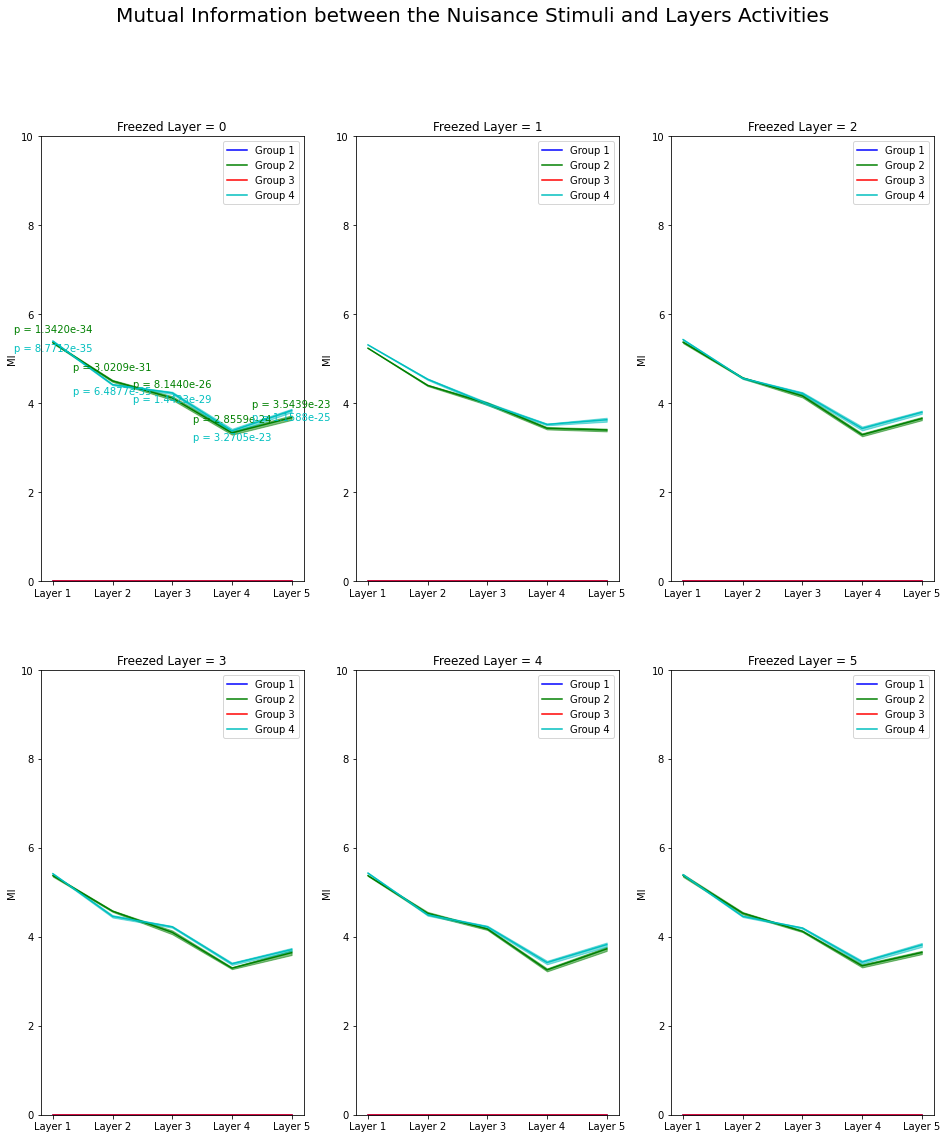

In [12]:
fig, axs = plt.subplots(2, 3, figsize = (2 * 8, 3 * 6))
fig.suptitle('Mutual Information between the Nuisance Stimuli and Layers Activities', fontsize = 20)

for i in range(number_layer_freeze):
    if i <= 2:
        ax = axs[0, i]
    elif i > 2:
        ax = axs[1, i - 3]
    
    ax.set_title('Freezed Layer = ' + str(i), fontsize = 12)
    ax.set_ylabel('MI')
    
    ax.plot(range(0, number_layer), np.nanmean(all_simulation_all_MI_noise, axis = 0)[0, :, i], "-b", label = "Group 1")
    ax.fill_between(range(0, number_layer), np.nanmean(all_simulation_all_MI_noise, axis = 0)[0, :, i] - np.nanstd(all_simulation_all_MI_noise, axis = 0)[0, :, i] / number_simulation ** 0.5, np.nanmean(all_simulation_all_MI_noise, axis = 0)[0, :, i] + np.nanstd(all_simulation_all_MI_noise, axis = 0)[0, :, i] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'b', facecolor = 'b')
    
    ax.plot(range(0, number_layer), np.nanmean(all_simulation_all_MI_noise, axis = 0)[1, :, i], "-g", label = "Group 2")
    ax.fill_between(range(0, number_layer), np.nanmean(all_simulation_all_MI_noise, axis = 0)[1, :, i] - np.nanstd(all_simulation_all_MI_noise, axis = 0)[1, :, i] / number_simulation ** 0.5, np.nanmean(all_simulation_all_MI_noise, axis = 0)[1, :, i] + np.nanstd(all_simulation_all_MI_noise, axis = 0)[1, :, i] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'g', facecolor = 'g')
    
    ax.plot(range(0, number_layer), np.nanmean(all_simulation_all_MI_noise, axis = 0)[2, :, i], "-r", label = "Group 3")
    ax.fill_between(range(0, number_layer), np.nanmean(all_simulation_all_MI_noise, axis = 0)[2, :, i] - np.nanstd(all_simulation_all_MI_noise, axis = 0)[2, :, i] / number_simulation ** 0.5, np.nanmean(all_simulation_all_MI_noise, axis = 0)[2, :, i] + np.nanstd(all_simulation_all_MI_noise, axis = 0)[2, :, i] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'r', facecolor = 'r')
    
    ax.plot(range(0, number_layer), np.nanmean(all_simulation_all_MI_noise, axis = 0)[3, :, i], "-c", label = "Group 4")
    ax.fill_between(range(0, number_layer), np.nanmean(all_simulation_all_MI_noise, axis = 0)[3, :, i] - np.nanstd(all_simulation_all_MI_noise, axis = 0)[3, :, i] / number_simulation ** 0.5, np.nanmean(all_simulation_all_MI_noise, axis = 0)[3, :, i] + np.nanstd(all_simulation_all_MI_noise, axis = 0)[3, :, i] / number_simulation ** 0.5, alpha = 0.5, edgecolor = 'c', facecolor = 'c')
             
    ax.legend(loc = 'upper right', fontsize = 'medium')
    ax.set_ylim((0, 10))
    ax.set_xticks(range(0, number_layer))
    ax.set_xticklabels(['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5'])
    
    if i == 0:
        t_stat_lp = np.zeros(number_layer)
        t_stat_hp = np.zeros(number_layer)
        
        p_value_lp = np.zeros(number_layer)
        p_value_hp = np.zeros(number_layer)
        
        for j in range(0, number_layer):
            t_stat_lp[j], p_value_lp[j] = stats.ttest_ind(all_simulation_all_MI_noise[:, 0, j, 0], all_simulation_all_MI_noise[:, 1, j, 0], equal_var = True, nan_policy = 'omit')
            t_stat_hp[j], p_value_hp[j] = stats.ttest_ind(all_simulation_all_MI_noise[:, 2, j, 0], all_simulation_all_MI_noise[:, 3, j, 0], equal_var = True, nan_policy = 'omit')
            
        for j, (x, y) in enumerate(zip(range(0, number_layer), np.nanmean(all_simulation_all_MI_noise, axis = 0)[1, :, 0])):
            label = 'p = {:.4e}'.format(p_value_lp[j])
            ax.annotate(label, (x, y), textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'g')
            
        for j, (x, y) in enumerate(zip(range(0, number_layer), np.nanmean(all_simulation_all_MI_noise, axis = 0)[3, :, 0])):
            label = 'p = {:.4e}'.format(p_value_hp[j])
            ax.annotate(label, (x, y), textcoords = "offset points", xytext = (0, -10), ha = 'center', color = 'c')

# From the following paper:
## Ansuini, A., Macke, J. H., Laio, A., & Zoccolan, D. (2019). Intrinsic dimension of data representations in deep neural networks. NeurIPS.

## ID across layers and groups for correct labels


ANOVA SUMMARY

Source          SS    DF1    DF2     MS        F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -------  -------  -----  -------
Group        0.559      3     36  0.186  150.010    0.000  0.926  nan
Layer        0.110      1     36  0.110   67.319    0.000  0.652    1.000
Interaction  0.683      3     36  0.228  139.686    0.000  0.921  nan


POST HOC TESTS

Contrast       Layer    A        B        Paired    Parametric          T     dof  Tail         p-unc                 BF10    hedges
-------------  -------  -------  -------  --------  ------------  -------  ------  ---------  -------  -------------------  --------
Layer          -        Layer 1  Layer 5  True      True            2.402  39.000  two-sided    0.021                2.164     0.559
Group          -        Group 1  Group 2  False     True            0.376  18.000  two-sided    0.711                0.418     0.161
Group          -        Group 1  Group 3  False     True           17.09

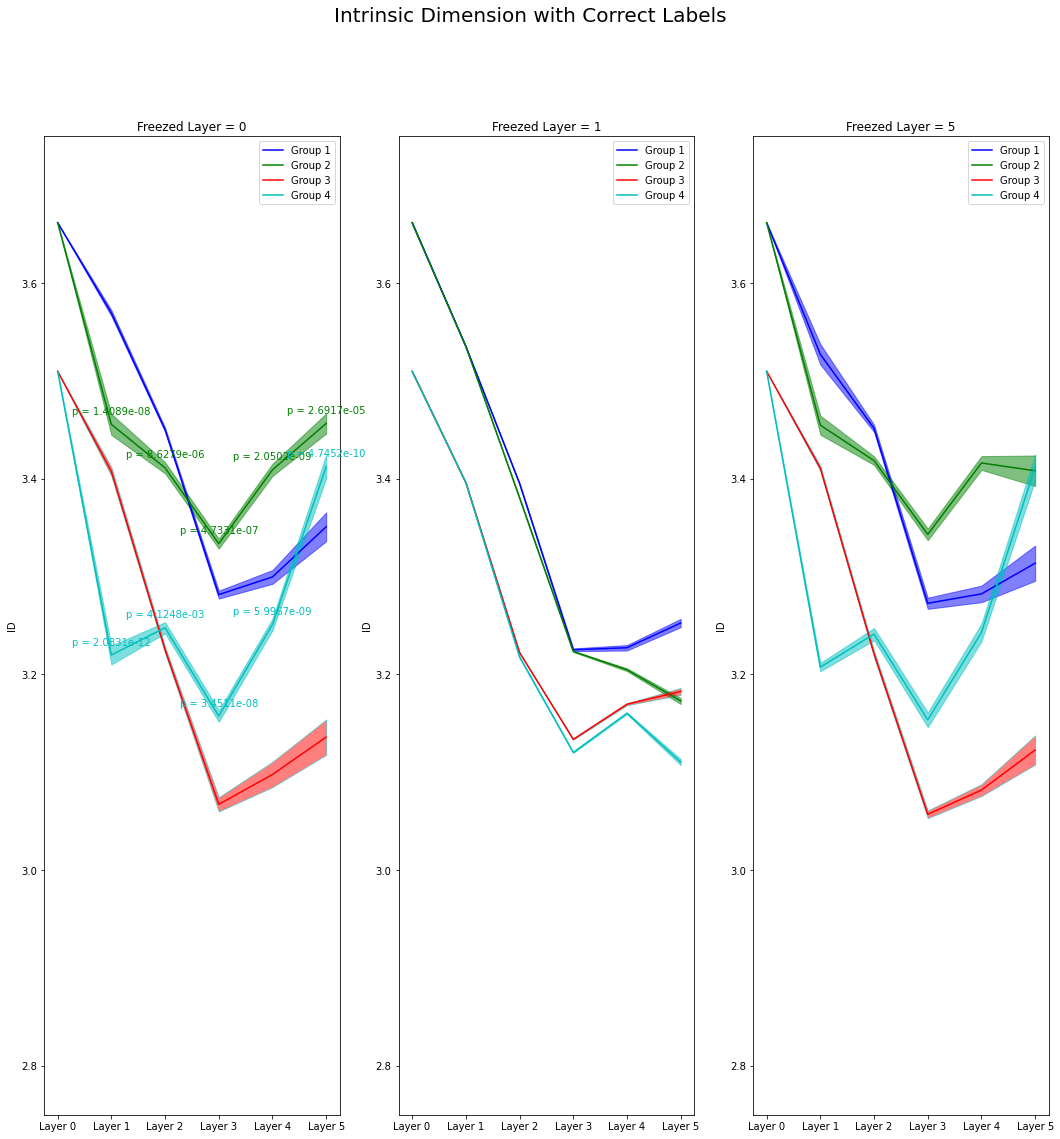

In [13]:
fig, axs = plt.subplots(1, 3, figsize = (1 * 18, 3 * 6))
fig.suptitle('Intrinsic Dimension with Correct Labels', fontsize = 20)

for i in [0, 1, 5]:
    if i == 0:
        ax = axs[0]
    elif i == 1:
        ax = axs[1]
    elif i == 5:
        ax = axs[2]
    
    ax.set_title('Freezed Layer = ' + str(i), fontsize = 12)
    ax.set_ylabel('ID')
    
    ax.plot(range(0, number_layer + 1), np.append(np.nanmean(all_x_sample_ID, axis = 0)[0], np.nanmean(all_simulation_all_ID, axis = 0)[0, :, i, -1]) , "-b", label = "Group 1")
    ax.fill_between(range(0, number_layer + 1), np.append(np.nanmean(all_x_sample_ID, axis = 0)[0], np.nanmean(all_simulation_all_ID, axis = 0)[0, :, i, -1] - np.nanstd(all_simulation_all_ID, axis = 0)[0, :, i, -1] / number_simulation ** 0.5), np.append(np.nanmean(all_x_sample_ID, axis = 0)[0], np.nanmean(all_simulation_all_ID, axis = 0)[0, :, i, -1] + np.nanstd(all_simulation_all_ID, axis = 0)[0, :, i, -1] / number_simulation ** 0.5), alpha = 0.5, edgecolor = 'b', facecolor = 'b')
    
    ax.plot(range(0, number_layer + 1), np.append(np.nanmean(all_x_sample_ID, axis = 0)[1], np.nanmean(all_simulation_all_ID, axis = 0)[1, :, i, -1]) , "-g", label = "Group 2")
    ax.fill_between(range(0, number_layer + 1), np.append(np.nanmean(all_x_sample_ID, axis = 0)[1], np.nanmean(all_simulation_all_ID, axis = 0)[1, :, i, -1] - np.nanstd(all_simulation_all_ID, axis = 0)[1, :, i, -1] / number_simulation ** 0.5), np.append(np.nanmean(all_x_sample_ID, axis = 0)[1], np.nanmean(all_simulation_all_ID, axis = 0)[1, :, i, -1] + np.nanstd(all_simulation_all_ID, axis = 0)[1, :, i, -1] / number_simulation ** 0.5), alpha = 0.5, edgecolor = 'g', facecolor = 'g')
    
    ax.plot(range(0, number_layer + 1), np.append(np.nanmean(all_x_sample_ID, axis = 0)[2], np.nanmean(all_simulation_all_ID, axis = 0)[2, :, i, -1]) , "-r", label = "Group 3")
    ax.fill_between(range(0, number_layer + 1), np.append(np.nanmean(all_x_sample_ID, axis = 0)[2], np.nanmean(all_simulation_all_ID, axis = 0)[2, :, i, -1] - np.nanstd(all_simulation_all_ID, axis = 0)[2, :, i, -1] / number_simulation ** 0.5), np.append(np.nanmean(all_x_sample_ID, axis = 0)[2], np.nanmean(all_simulation_all_ID, axis = 0)[2, :, i, -1] + np.nanstd(all_simulation_all_ID, axis = 0)[2, :, i, -1] / number_simulation ** 0.5), alpha = 0.5, edgecolor = 'c', facecolor = 'r')
    
    ax.plot(range(0, number_layer + 1), np.append(np.nanmean(all_x_sample_ID, axis = 0)[3], np.nanmean(all_simulation_all_ID, axis = 0)[3, :, i, -1]) , "-c", label = "Group 4")
    ax.fill_between(range(0, number_layer + 1), np.append(np.nanmean(all_x_sample_ID, axis = 0)[3], np.nanmean(all_simulation_all_ID, axis = 0)[3, :, i, -1] - np.nanstd(all_simulation_all_ID, axis = 0)[3, :, i, -1] / number_simulation ** 0.5), np.append(np.nanmean(all_x_sample_ID, axis = 0)[3], np.nanmean(all_simulation_all_ID, axis = 0)[3, :, i, -1] + np.nanstd(all_simulation_all_ID, axis = 0)[3, :, i, -1] / number_simulation ** 0.5), alpha = 0.5, edgecolor = 'c', facecolor = 'c')
            
    ax.legend(loc = 'upper right', fontsize = 'medium')
    ax.set_ylim((2.75, 3.75))
    ax.set_xticks(range(0, number_layer + 1))
    ax.set_xticklabels(['Layer 0', 'Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5'])
    
    if i == 0:
        t_stat_lp = np.zeros(number_layer)
        t_stat_hp = np.zeros(number_layer)
        
        p_value_lp = np.zeros(number_layer)
        p_value_hp = np.zeros(number_layer)
        
        for j in range(0, number_layer):
            t_stat_lp[j], p_value_lp[j] = stats.ttest_ind(all_simulation_all_ID[:, 0, j, 0, -1], all_simulation_all_ID[:, 1, j, 0, -1], equal_var = True, nan_policy = 'omit')
            t_stat_hp[j], p_value_hp[j] = stats.ttest_ind(all_simulation_all_ID[:, 2, j, 0, -1], all_simulation_all_ID[:, 3, j, 0, -1], equal_var = True, nan_policy = 'omit')
            
        for j, (x, y) in enumerate(zip(range(1, number_layer + 1), np.nanmean(all_simulation_all_ID, axis = 0)[1, :, 0, -1])):
            label = 'p = {:.4e}'.format(p_value_lp[j])
            ax.annotate(label, (x, y), textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'g')
            
        for j, (x, y) in enumerate(zip(range(1, number_layer + 1), np.nanmean(all_simulation_all_ID, axis = 0)[3, :, 0, -1])):
            label = 'p = {:.4e}'.format(p_value_hp[j])
            ax.annotate(label, (x, y), textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c')
            
        all_simulation_group_layer15_ID = np.concatenate((all_simulation_all_ID[:, 0, 0, 0, -1].flatten(), all_simulation_all_ID[:, 0, 4, 0, -1].flatten(),
                                                          all_simulation_all_ID[:, 1, 0, 0, -1].flatten(), all_simulation_all_ID[:, 1, 4, 0, -1].flatten(),
                                                          all_simulation_all_ID[:, 2, 0, 0, -1].flatten(), all_simulation_all_ID[:, 2, 4, 0, -1].flatten(),
                                                          all_simulation_all_ID[:, 3, 0, 0, -1].flatten(), all_simulation_all_ID[:, 3, 4, 0, -1].flatten()))

        df = pd.DataFrame({'ID': all_simulation_group_layer15_ID,
                            'Simulation': np.concatenate((np.tile(np.arange(number_simulation), 2), number_simulation + np.tile(np.arange(number_simulation), 2), 2 * number_simulation + np.tile(np.arange(number_simulation), 2), 3 * number_simulation + np.tile(np.arange(number_simulation), 2))),
                            'Layer': np.tile(np.repeat(['Layer 1', 'Layer 5'], number_simulation), number_group),
                            'Group': np.concatenate((np.tile(['Group 1'], 2 * number_simulation), np.tile(['Group 2'], 2 * number_simulation), np.tile(['Group 3'], 2 * number_simulation), np.tile(['Group 4'], 2 * number_simulation)))})
        
        aov = pg.mixed_anova(dv = 'ID', within = 'Layer', between = 'Group', subject = 'Simulation', data = df)
        pg.print_table(aov)
        
        posthocs = pg.pairwise_ttests(dv = 'ID', within = 'Layer', between = 'Group', subject = 'Simulation', data = df)
        pg.print_table(posthocs)

## ID across layers and groups for permuted labels


ANOVA SUMMARY

Source          SS    DF1    DF2     MS         F    p-unc    np2      eps
-----------  -----  -----  -----  -----  --------  -------  -----  -------
Group        0.557      3     36  0.186   225.469    0.000  0.949  nan
Layer        4.075      1     36  4.075  4415.764    0.000  0.992    1.000
Interaction  0.069      3     36  0.023    24.801    0.000  0.674  nan


POST HOC TESTS

Contrast       Layer    A        B        Paired    Parametric         T     dof  Tail         p-unc                                BF10    hedges
-------------  -------  -------  -------  --------  ------------  ------  ------  ---------  -------  ----------------------------------  --------
Layer          -        Layer 1  Layer 5  True      True          39.495  39.000  two-sided    0.000  417399999999999975254680141824.000     4.757
Group          -        Group 1  Group 2  False     True          -1.172  18.000  two-sided    0.257                               0.640    -0.502
Group      

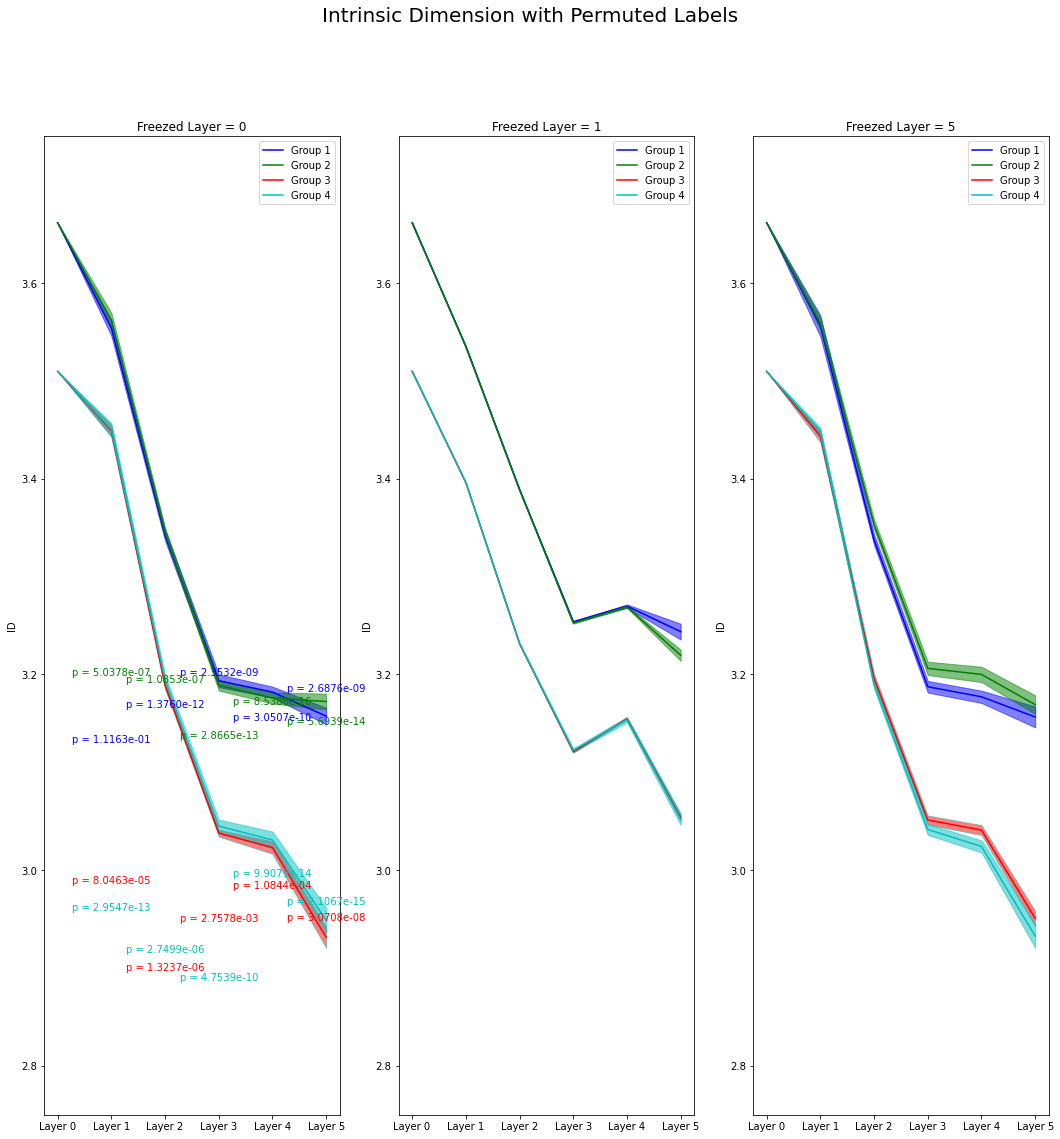

In [14]:
fig, axs = plt.subplots(1, 3, figsize = (1 * 18, 3 * 6))
fig.suptitle('Intrinsic Dimension with Permuted Labels', fontsize = 20)

for i in [0, 1, 5]:
    if i == 0:
        ax = axs[0]
    elif i == 1:
        ax = axs[1]
    elif i == 5:
        ax = axs[2]
    
    ax.set_title('Freezed Layer = ' + str(i), fontsize = 12)
    ax.set_ylabel('ID')
    
    ax.plot(range(0, number_layer + 1), np.append(np.nanmean(all_x_sample_ID, axis = 0)[0], np.nanmean(all_simulation_all_ID_permuted, axis = 0)[0, :, i, -1]) , "-b", label = "Group 1")
    ax.fill_between(range(0, number_layer + 1), np.append(np.nanmean(all_x_sample_ID, axis = 0)[0], np.nanmean(all_simulation_all_ID_permuted, axis = 0)[0, :, i, -1] - np.nanstd(all_simulation_all_ID_permuted, axis = 0)[0, :, i, -1] / number_simulation ** 0.5), np.append(np.nanmean(all_x_sample_ID, axis = 0)[0], np.nanmean(all_simulation_all_ID_permuted, axis = 0)[0, :, i, -1] + np.nanstd(all_simulation_all_ID_permuted, axis = 0)[0, :, i, -1] / number_simulation ** 0.5), alpha = 0.5, edgecolor = 'b', facecolor = 'b')
    
    ax.plot(range(0, number_layer + 1), np.append(np.nanmean(all_x_sample_ID, axis = 0)[1], np.nanmean(all_simulation_all_ID_permuted, axis = 0)[1, :, i, -1]) , "-g", label = "Group 2")
    ax.fill_between(range(0, number_layer + 1), np.append(np.nanmean(all_x_sample_ID, axis = 0)[1], np.nanmean(all_simulation_all_ID_permuted, axis = 0)[1, :, i, -1] - np.nanstd(all_simulation_all_ID_permuted, axis = 0)[1, :, i, -1] / number_simulation ** 0.5), np.append(np.nanmean(all_x_sample_ID, axis = 0)[1], np.nanmean(all_simulation_all_ID_permuted, axis = 0)[1, :, i, -1] + np.nanstd(all_simulation_all_ID_permuted, axis = 0)[1, :, i, -1] / number_simulation ** 0.5), alpha = 0.5, edgecolor = 'g', facecolor = 'g')
    
    ax.plot(range(0, number_layer + 1), np.append(np.nanmean(all_x_sample_ID, axis = 0)[2], np.nanmean(all_simulation_all_ID_permuted, axis = 0)[2, :, i, -1]) , "-r", label = "Group 3")
    ax.fill_between(range(0, number_layer + 1), np.append(np.nanmean(all_x_sample_ID, axis = 0)[2], np.nanmean(all_simulation_all_ID_permuted, axis = 0)[2, :, i, -1] - np.nanstd(all_simulation_all_ID_permuted, axis = 0)[2, :, i, -1] / number_simulation ** 0.5), np.append(np.nanmean(all_x_sample_ID, axis = 0)[2], np.nanmean(all_simulation_all_ID_permuted, axis = 0)[2, :, i, -1] + np.nanstd(all_simulation_all_ID_permuted, axis = 0)[2, :, i, -1] / number_simulation ** 0.5), alpha = 0.5, edgecolor = 'c', facecolor = 'r')
    
    ax.plot(range(0, number_layer + 1), np.append(np.nanmean(all_x_sample_ID, axis = 0)[3], np.nanmean(all_simulation_all_ID_permuted, axis = 0)[3, :, i, -1]) , "-c", label = "Group 4")
    ax.fill_between(range(0, number_layer + 1), np.append(np.nanmean(all_x_sample_ID, axis = 0)[3], np.nanmean(all_simulation_all_ID_permuted, axis = 0)[3, :, i, -1] - np.nanstd(all_simulation_all_ID_permuted, axis = 0)[3, :, i, -1] / number_simulation ** 0.5), np.append(np.nanmean(all_x_sample_ID, axis = 0)[3], np.nanmean(all_simulation_all_ID_permuted, axis = 0)[3, :, i, -1] + np.nanstd(all_simulation_all_ID_permuted, axis = 0)[3, :, i, -1] / number_simulation ** 0.5), alpha = 0.5, edgecolor = 'c', facecolor = 'c')
    
    ax.legend(loc = 'upper right', fontsize = 'medium')
    ax.set_ylim((2.75, 3.75))
    ax.set_xticks(range(0, number_layer + 1))
    ax.set_xticklabels(['Layer 0', 'Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5'])
    
    if i == 0:
        t_stat_1 = np.zeros(number_layer)
        t_stat_2 = np.zeros(number_layer)
        t_stat_3 = np.zeros(number_layer)
        t_stat_4 = np.zeros(number_layer)
        
        p_value_1 = np.zeros(number_layer)
        p_value_2 = np.zeros(number_layer)
        p_value_3 = np.zeros(number_layer)
        p_value_4 = np.zeros(number_layer)
        
        for j in range(0, number_layer):
            t_stat_1[j], p_value_1[j] = stats.ttest_ind(all_simulation_all_ID[:, 0, j, 0, -1], all_simulation_all_ID_permuted[:, 0, j, 0, -1], equal_var = True, nan_policy = 'omit')
            t_stat_2[j], p_value_2[j] = stats.ttest_ind(all_simulation_all_ID[:, 1, j, 0, -1], all_simulation_all_ID_permuted[:, 1, j, 0, -1], equal_var = True, nan_policy = 'omit')
            t_stat_3[j], p_value_3[j] = stats.ttest_ind(all_simulation_all_ID[:, 2, j, 0, -1], all_simulation_all_ID_permuted[:, 2, j, 0, -1], equal_var = True, nan_policy = 'omit')
            t_stat_4[j], p_value_4[j] = stats.ttest_ind(all_simulation_all_ID[:, 3, j, 0, -1], all_simulation_all_ID_permuted[:, 3, j, 0, -1], equal_var = True, nan_policy = 'omit')
        
        for j, (x, y) in enumerate(zip(range(1, number_layer + 1), all_simulation_all_ID_permuted[:, 0, j, 0, -1])):
            label = 'p = {:.4e}'.format(p_value_1[j])
            ax.annotate(label, (x, y), textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'b')
            
        for j, (x, y) in enumerate(zip(range(1, number_layer + 1), all_simulation_all_ID_permuted[:, 1, j, 0, -1])):
            label = 'p = {:.4e}'.format(p_value_2[j])
            ax.annotate(label, (x, y), textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'g')
            
        for j, (x, y) in enumerate(zip(range(1, number_layer + 1), all_simulation_all_ID_permuted[:, 2, j, 0, -1])):
            label = 'p = {:.4e}'.format(p_value_3[j])
            ax.annotate(label, (x, y), textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'r')
            
        for j, (x, y) in enumerate(zip(range(1, number_layer + 1), all_simulation_all_ID_permuted[:, 3, j, 0, -1])):
            label = 'p = {:.4e}'.format(p_value_4[j])
            ax.annotate(label, (x, y), textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c')
            
        all_simulation_group_layer15_ID = np.concatenate((all_simulation_all_ID_permuted[:, 0, 0, 0, -1].flatten(), all_simulation_all_ID_permuted[:, 0, 4, 0, -1].flatten(),
                                                          all_simulation_all_ID_permuted[:, 1, 0, 0, -1].flatten(), all_simulation_all_ID_permuted[:, 1, 4, 0, -1].flatten(),
                                                          all_simulation_all_ID_permuted[:, 2, 0, 0, -1].flatten(), all_simulation_all_ID_permuted[:, 2, 4, 0, -1].flatten(),
                                                          all_simulation_all_ID_permuted[:, 3, 0, 0, -1].flatten(), all_simulation_all_ID_permuted[:, 3, 4, 0, -1].flatten()))

        df = pd.DataFrame({'ID': all_simulation_group_layer15_ID,
                            'Simulation': np.concatenate((np.tile(np.arange(number_simulation), 2), number_simulation + np.tile(np.arange(number_simulation), 2), 2 * number_simulation + np.tile(np.arange(number_simulation), 2), 3 * number_simulation + np.tile(np.arange(number_simulation), 2))),
                            'Layer': np.tile(np.repeat(['Layer 1', 'Layer 5'], number_simulation), number_group),
                            'Group': np.concatenate((np.tile(['Group 1'], 2 * number_simulation), np.tile(['Group 2'], 2 * number_simulation), np.tile(['Group 3'], 2 * number_simulation), np.tile(['Group 4'], 2 * number_simulation)))})
        
        aov = pg.mixed_anova(dv = 'ID', within = 'Layer', between = 'Group', subject = 'Simulation', data = df)
        pg.print_table(aov)
        
        posthocs = pg.pairwise_ttests(dv = 'ID', within = 'Layer', between = 'Group', subject = 'Simulation', data = df)
        pg.print_table(posthocs)

## Scatter plot of ID in the first layer versus transfer accuracy

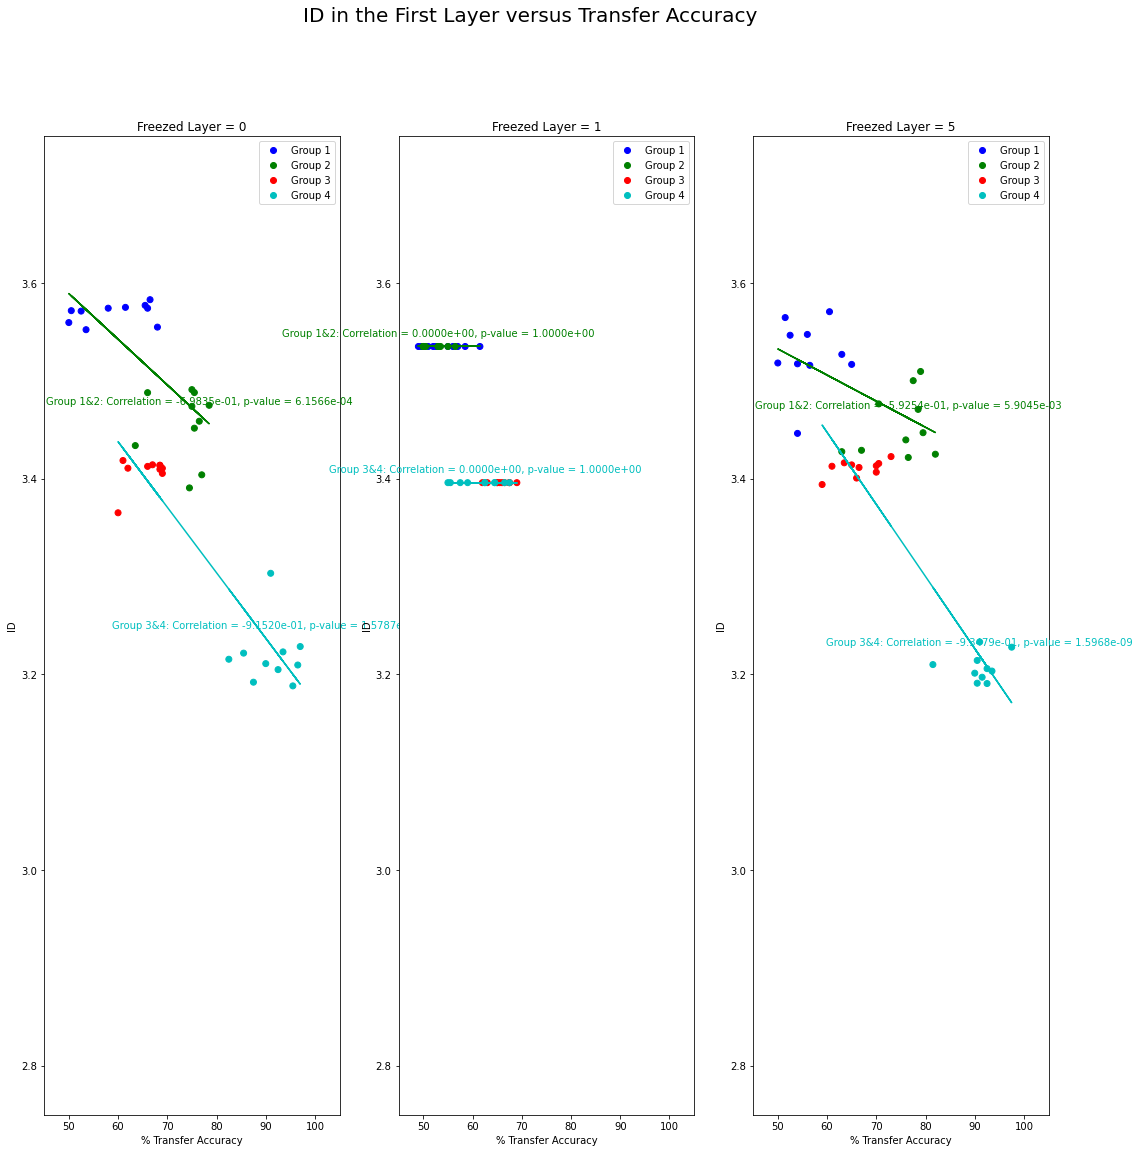

In [15]:
fig, axs = plt.subplots(1, 3, figsize = (1 * 18, 3 * 6))
fig.suptitle('ID in the First Layer versus Transfer Accuracy', fontsize = 20)

for i in [0, 1, 5]:
    if i == 0:
        ax = axs[0]
    elif i == 1:
        ax = axs[1]
    elif i == 5:
        ax = axs[2]
    
    ax.set_title('Freezed Layer = ' + str(i), fontsize = 12)
    ax.set_xlabel('% Transfer Accuracy')
    ax.set_ylabel('ID')
    
    x = np.zeros(number_group * number_simulation)
    y = np.zeros(number_group * number_simulation)
    point_label = np.zeros(number_group * number_simulation)
    
    for j in range(number_group):
        x[j * number_simulation:(j + 1) * number_simulation] = all_simulation_transfer_accuracy.mean(3)[:, j, i]
        y[j * number_simulation:(j + 1) * number_simulation] = all_simulation_all_ID[:, j, 0, i, -1]
        point_label[j * number_simulation:(j + 1) * number_simulation] = j
    
    colours = ListedColormap(['b', 'g', 'r', 'c'])
    scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
    classes = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
    ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes)
    
    slope_12, intercept_12, r_value_12, p_value_12, std_err_12 = stats.linregress(x[0:2 * number_simulation], y[0:2 * number_simulation])
    slope_34, intercept_34, r_value_34, p_value_34, std_err_34 = stats.linregress(x[2 * number_simulation:4 * number_simulation], y[2 * number_simulation:4 * number_simulation])
    
    ax.plot(x[0:2 * number_simulation], intercept_12 + slope_12 * x[0:2 * number_simulation], color = 'g')
    ax.plot(x[2 * number_simulation:4 * number_simulation], intercept_34 + slope_34 * x[2 * number_simulation:4 * number_simulation], color = 'c')
    
    ax.annotate('Group 1&2: Correlation = {:.4e}'.format(r_value_12) + ', p-value = {:.4e}'.format(p_value_12),
                (x[number_simulation], intercept_12 + slope_12 * x[number_simulation]),
                textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'g')
    
    ax.annotate('Group 3&4: Correlation = {:.4e}'.format(r_value_34) + ', p-value = {:.4e}'.format(p_value_34),
                (x[3 * number_simulation], intercept_34 + slope_34 * x[3 * number_simulation]),
                textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c')
           
    ax.set_xlim((45, 105))
    ax.set_ylim((2.75, 3.75))

## Scatter plot of ID in the last layer versus transfer accuracy

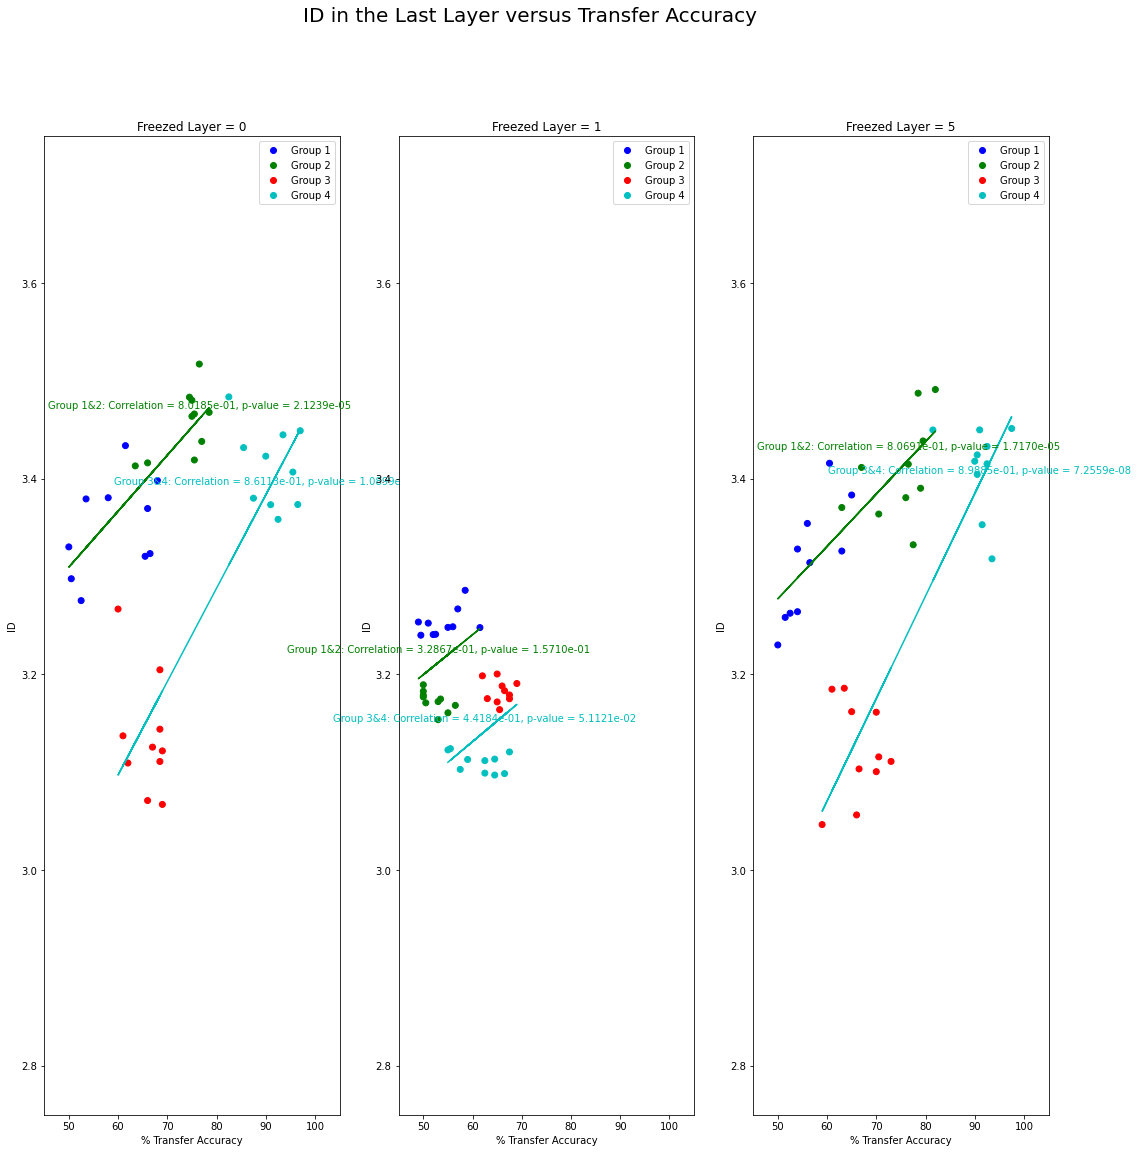

In [16]:
fig, axs = plt.subplots(1, 3, figsize = (1 * 18, 3 * 6))
fig.suptitle('ID in the Last Layer versus Transfer Accuracy', fontsize = 20)

for i in [0, 1, 5]:
    if i == 0:
        ax = axs[0]
    elif i == 1:
        ax = axs[1]
    elif i == 5:
        ax = axs[2]
    
    ax.set_title('Freezed Layer = ' + str(i), fontsize = 12)
    ax.set_xlabel('% Transfer Accuracy')
    ax.set_ylabel('ID')
    
    x = np.zeros(number_group * number_simulation)
    y = np.zeros(number_group * number_simulation)
    point_label = np.zeros(number_group * number_simulation)
    
    for j in range(number_group):
        x[j * number_simulation:(j + 1) * number_simulation] = all_simulation_transfer_accuracy.mean(3)[:, j, i]
        y[j * number_simulation:(j + 1) * number_simulation] = all_simulation_all_ID[:, j, -1, i, -1]
        point_label[j * number_simulation:(j + 1) * number_simulation] = j
          
    colours = ListedColormap(['b', 'g', 'r', 'c'])
    scatter_legend = ax.scatter(x, y, c = point_label, cmap = colours)
    
    classes = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
    ax.legend(handles = scatter_legend.legend_elements()[0], labels = classes)
    
    slope_12, intercept_12, r_value_12, p_value_12, std_err_12 = stats.linregress(x[0:2 * number_simulation], y[0:2 * number_simulation])
    slope_34, intercept_34, r_value_34, p_value_34, std_err_34 = stats.linregress(x[2 * number_simulation:4 * number_simulation], y[2 * number_simulation:4 * number_simulation])
    
    ax.plot(x[0:2 * number_simulation], intercept_12 + slope_12 * x[0:2 * number_simulation], color = 'g')
    ax.plot(x[2 * number_simulation:4 * number_simulation], intercept_34 + slope_34 * x[2 * number_simulation:4 * number_simulation], color = 'c')
    
    ax.annotate('Group 1&2: Correlation = {:.4e}'.format(r_value_12) + ', p-value = {:.4e}'.format(p_value_12),
                (x[number_simulation], intercept_12 + slope_12 * x[number_simulation]),
                textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'g')
    
    ax.annotate('Group 3&4: Correlation = {:.4e}'.format(r_value_34) + ', p-value = {:.4e}'.format(p_value_34),
                (x[3 * number_simulation], intercept_34 + slope_34 * x[3 * number_simulation]),
                textcoords = "offset points", xytext = (0, 10), ha = 'center', color = 'c')
    
    ax.set_xlim((45, 105))
    ax.set_ylim((2.75, 3.75))

## ID across layers and epochs for correct labels

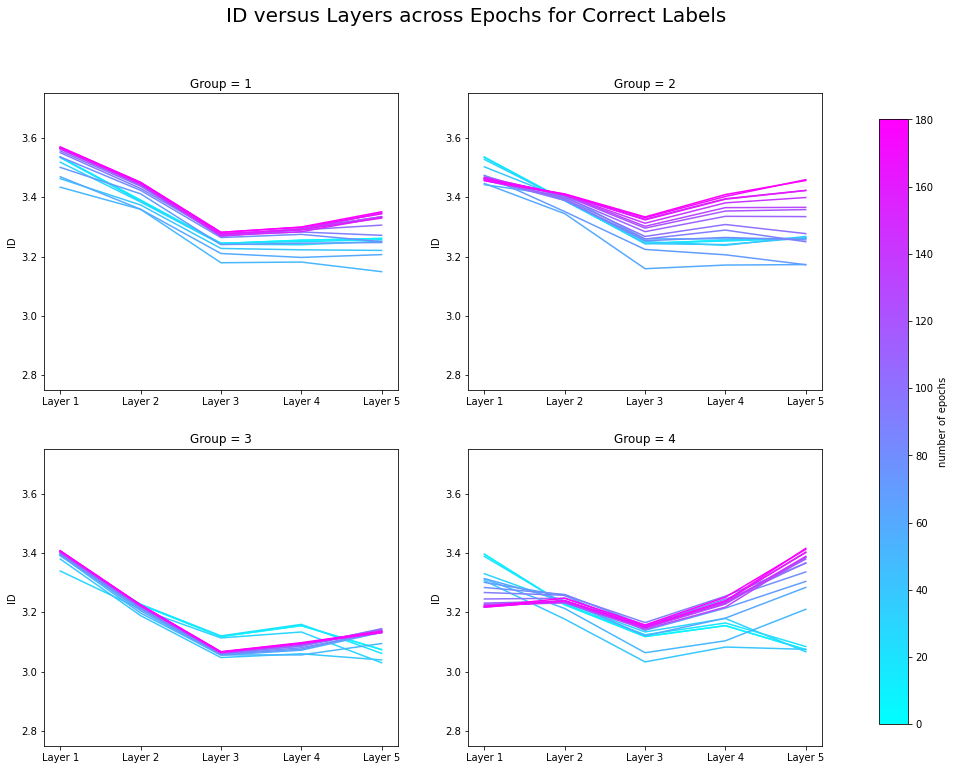

In [17]:
fig, axs = plt.subplots(2, 2, figsize = (2 * 8, 2 * 6))
fig.suptitle('ID versus Layers across Epochs for Correct Labels', fontsize = 20)

for i in range(number_group):
    if i <= 1:
        ax = axs[0, i]
    elif i > 1:
        ax = axs[1, i - 2]
    
    ax.set_title('Group = ' + str(i + 1), fontsize = 12)
    ax.set_ylabel('ID')
    ax.set_ylim((2.75, 3.75))
    
    ax.set_xticks(range(0, number_layer))
    ax.set_xticklabels(['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5'])
    
    n_lines = 19        
    parameters = np.arange(0, n_lines)
    norm = matplotlib.colors.Normalize(vmin = np.min(parameters), vmax = np.max(parameters))
    
    c_m = matplotlib.cm.cool
    s_m = matplotlib.cm.ScalarMappable(cmap = c_m, norm = norm)
    s_m.set_array([])
    
    for j in range(n_lines):
        x = np.arange(0, number_layer)
        y = np.nanmean(all_simulation_all_ID, axis = 0)[i, :, 0, j]
        ax.plot(x, y, color = s_m.to_rgba(j))
    
fig.subplots_adjust(right = 0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
cbar = fig.colorbar(s_m, cax = cbar_ax)
cbar.set_label('number of epochs')
cbar.set_ticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
cbar.set_ticklabels(['0', '20', '40', '60', '80', '100', '120', '140', '160', '180'])

## ID across layers and epochs for permuted labels

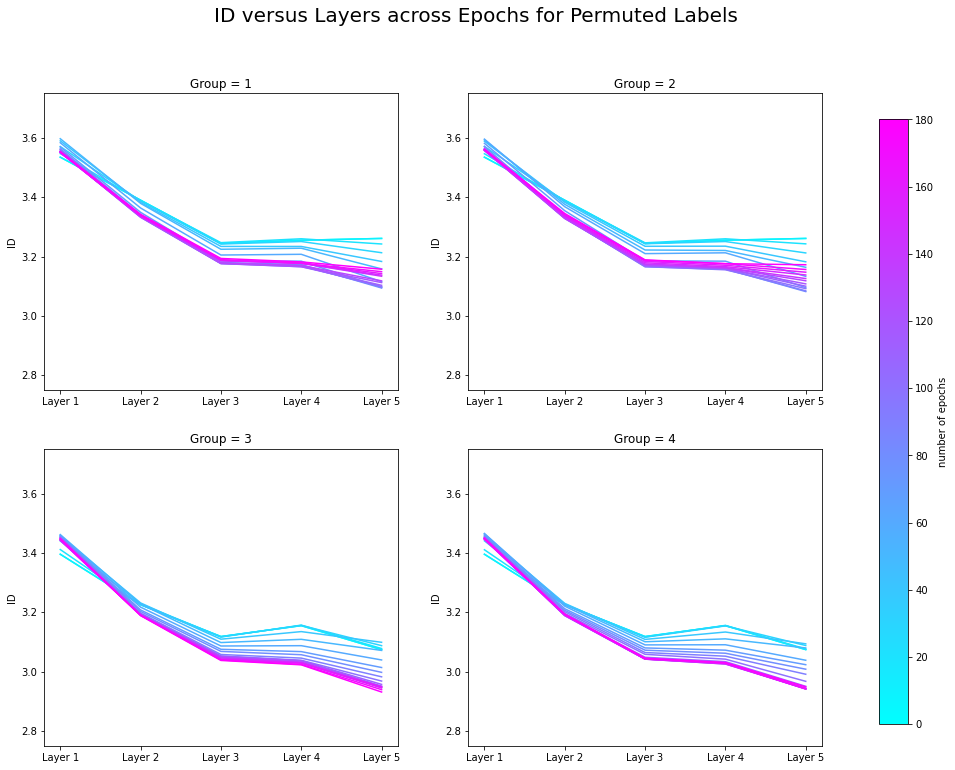

In [18]:
fig, axs = plt.subplots(2, 2, figsize = (2 * 8, 2 * 6))
fig.suptitle('ID versus Layers across Epochs for Permuted Labels', fontsize = 20)

for i in range(number_group):
    if i <= 1:
        ax = axs[0, i]
    elif i > 1:
        ax = axs[1, i - 2]
    
    ax.set_title('Group = ' + str(i + 1), fontsize = 12)
    ax.set_ylabel('ID')
    ax.set_ylim((2.75, 3.75))
    
    ax.set_xticks(range(0, number_layer))
    ax.set_xticklabels(['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4', 'Layer 5'])
    
    n_lines = 19
    parameters = np.arange(0, n_lines)
    norm = matplotlib.colors.Normalize(vmin = np.min(parameters), vmax = np.max(parameters))
    
    c_m = matplotlib.cm.cool
    s_m = matplotlib.cm.ScalarMappable(cmap = c_m, norm = norm)
    s_m.set_array([])
    
    for j in range(n_lines):
        x = np.arange(0, number_layer)
        y = np.nanmean(all_simulation_all_ID_permuted, axis = 0)[i, :, 0, j]
        ax.plot(x, y, color = s_m.to_rgba(j))
    
fig.subplots_adjust(right = 0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
cbar = fig.colorbar(s_m, cax = cbar_ax)
cbar.set_label('number of epochs')
cbar.set_ticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
cbar.set_ticklabels(['0', '20', '40', '60', '80', '100', '120', '140', '160', '180'])

## ID in the first layer versus training accuracy across epochs for correct labels

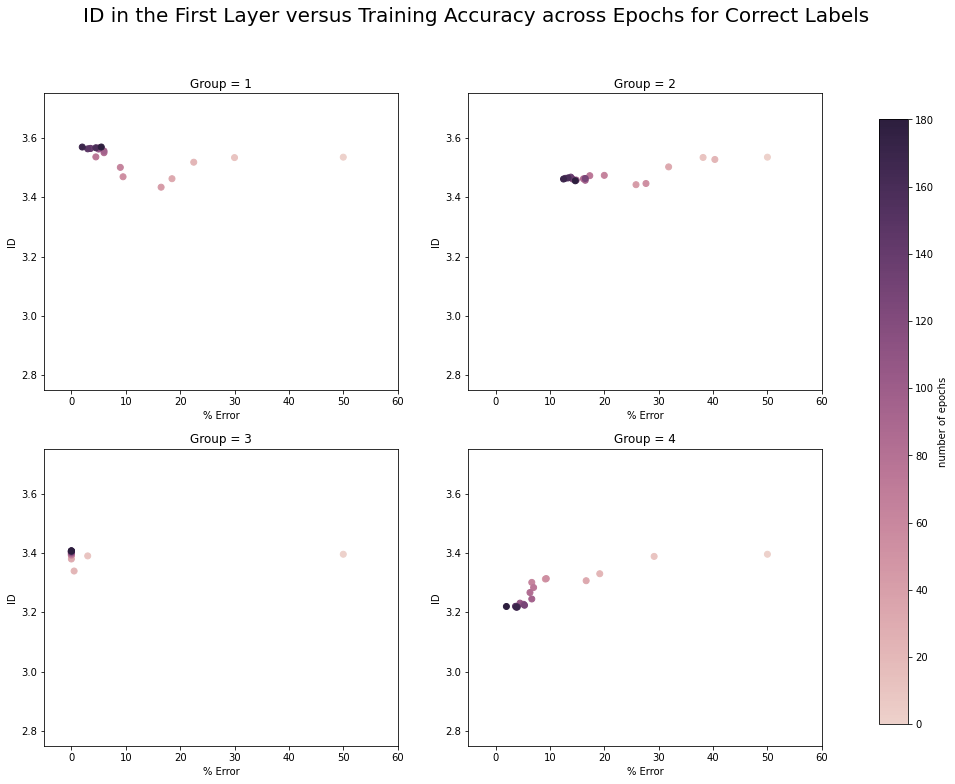

In [19]:
fig, axs = plt.subplots(2, 2, figsize = (2 * 8, 2 * 6))
fig.suptitle('ID in the First Layer versus Training Accuracy across Epochs for Correct Labels', fontsize = 20)

for i in range(number_group):
    if i <= 1:
        ax = axs[0, i]
    elif i > 1:
        ax = axs[1, i - 2]
    
    ax.set_title('Group = ' + str(i + 1), fontsize = 12)
    
    ax.set_xlabel('% Error')
    ax.set_xlim((-5, 60))
    
    ax.set_ylabel('ID')
    ax.set_ylim((2.75, 3.75))
    
    n_points = 18
    
    x = np.zeros(n_points)
    for j in range(n_points):
        x[j] = 100 - all_simulation_training_accuracy.mean(0)[i, 0, 10 * j]
    y = np.nanmean(all_simulation_all_ID, axis = 0)[i, 0, 0, 1:]
    
    color_idx = np.linspace(0, 1, n_points)
    
    cmap = sns.cubehelix_palette(as_cmap = True)
    points = ax.scatter(x, y, c = color_idx, cmap = cmap)

fig.subplots_adjust(right = 0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
cbar = fig.colorbar(points, cax = cbar_ax)
cbar.set_label('number of epochs')
cbar.set_ticks([0, 2 / 18, 4 / 18, 6 / 18, 8 / 18, 10 / 18, 12 / 18, 14 / 18, 16 / 18, 1])
cbar.set_ticklabels(['0', '20', '40', '60', '80', '100', '120', '140', '160', '180'])

## ID in the last layer versus training accuracy across epochs for correct labels

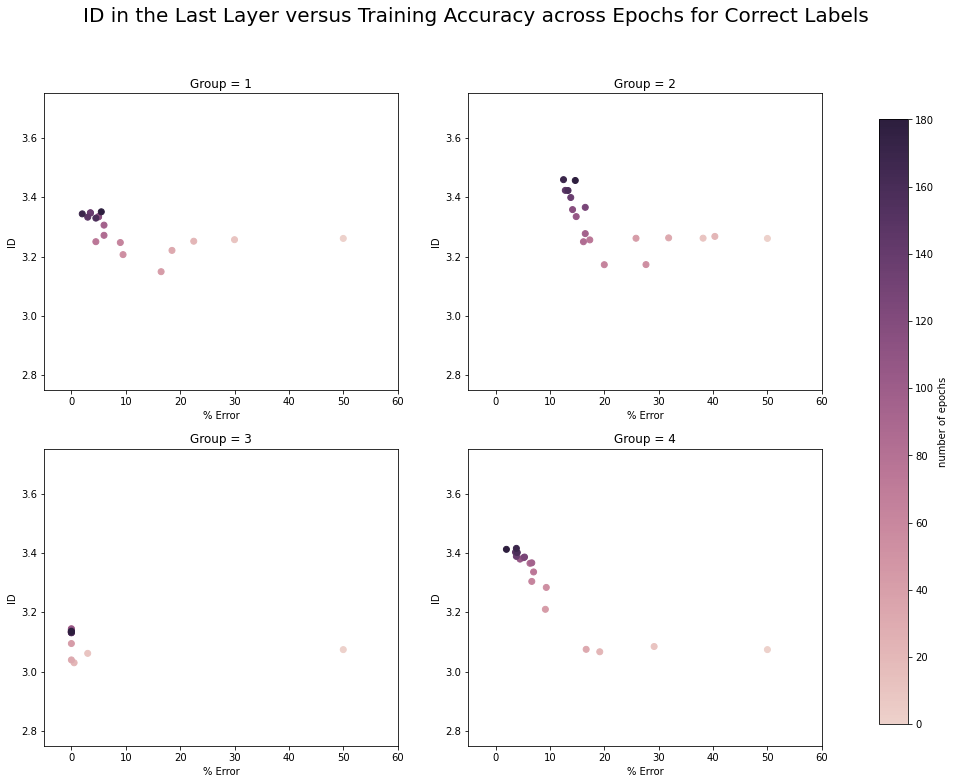

In [20]:
fig, axs = plt.subplots(2, 2, figsize = (2 * 8, 2 * 6))
fig.suptitle('ID in the Last Layer versus Training Accuracy across Epochs for Correct Labels', fontsize = 20)

for i in range(number_group):
    if i <= 1:
        ax = axs[0, i]
    elif i > 1:
        ax = axs[1, i - 2]
    
    ax.set_title('Group = ' + str(i + 1), fontsize = 12)
    
    ax.set_xlabel('% Error')
    ax.set_xlim((-5, 60))
    
    ax.set_ylabel('ID')
    ax.set_ylim((2.75, 3.75))
    
    n_points = 18
    
    x = np.zeros(n_points)
    for j in range(n_points):
        x[j] = 100 - all_simulation_training_accuracy.mean(0)[i, 0, 10 * j]
    y = np.nanmean(all_simulation_all_ID, axis = 0)[i, -1, 0, 1:]
    
    color_idx = np.linspace(0, 1, n_points)
    
    cmap = sns.cubehelix_palette(as_cmap = True)
    points = ax.scatter(x, y, c = color_idx, cmap = cmap)

fig.subplots_adjust(right = 0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
cbar = fig.colorbar(points, cax = cbar_ax)
cbar.set_label('number of epochs')
cbar.set_ticks([0, 2 / 18, 4 / 18, 6 / 18, 8 / 18, 10 / 18, 12 / 18, 14 / 18, 16 / 18, 1])
cbar.set_ticklabels(['0', '20', '40', '60', '80', '100', '120', '140', '160', '180'])

## ID in the first layer versus training accuracy across epochs for permuted labels

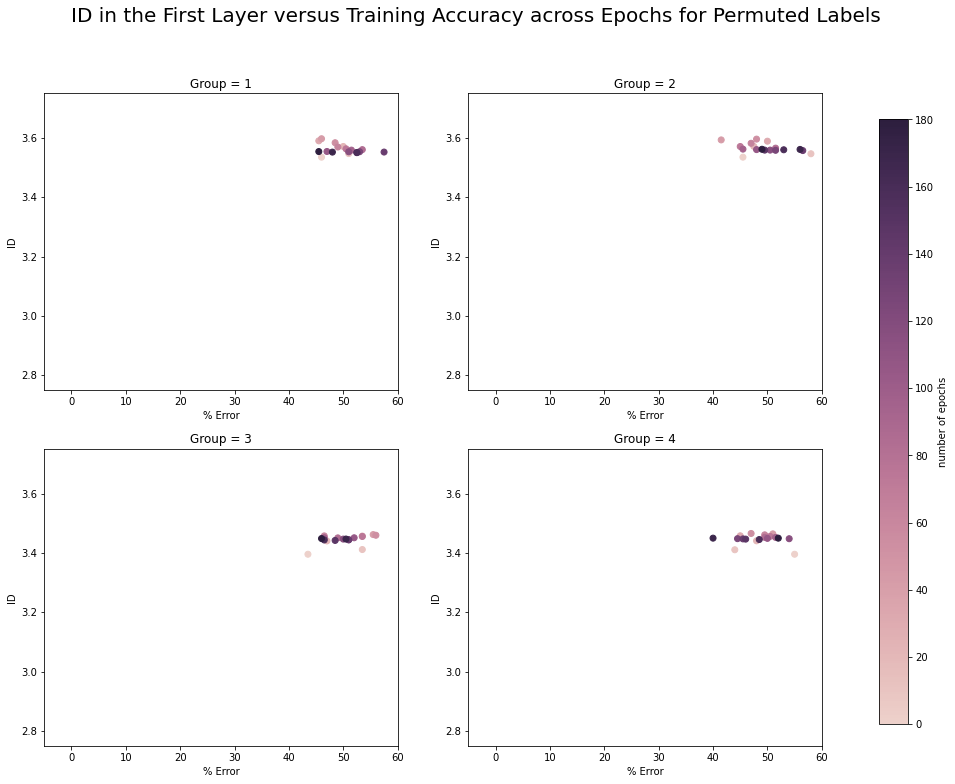

In [21]:
fig, axs = plt.subplots(2, 2, figsize = (2 * 8, 2 * 6))
fig.suptitle('ID in the First Layer versus Training Accuracy across Epochs for Permuted Labels', fontsize = 20)

for i in range(number_group):
    if i <= 1:
        ax = axs[0, i]
    elif i > 1:
        ax = axs[1, i - 2]
    
    ax.set_title('Group = ' + str(i + 1), fontsize = 12)
    
    ax.set_xlabel('% Error')
    ax.set_xlim((-5, 60))
    
    ax.set_ylabel('ID')
    ax.set_ylim((2.75, 3.75))
    
    n_points = 18
    
    x = np.zeros(n_points)
    for j in range(n_points):
        x[j] = 100 - all_simulation_training_accuracy_permuted.mean(0)[i, 0, 10 * j]
    y = np.nanmean(all_simulation_all_ID_permuted, axis = 0)[i, 0, 0, 1:]
    
    color_idx = np.linspace(0, 1, n_points)
    
    cmap = sns.cubehelix_palette(as_cmap = True)
    points = ax.scatter(x, y, c = color_idx, cmap = cmap)

fig.subplots_adjust(right = 0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
cbar = fig.colorbar(points, cax = cbar_ax)
cbar.set_label('number of epochs')
cbar.set_ticks([0, 2 / 18, 4 / 18, 6 / 18, 8 / 18, 10 / 18, 12 / 18, 14 / 18, 16 / 18, 1])
cbar.set_ticklabels(['0', '20', '40', '60', '80', '100', '120', '140', '160', '180'])

## ID in the last layer versus training accuracy across epochs for permuted labels

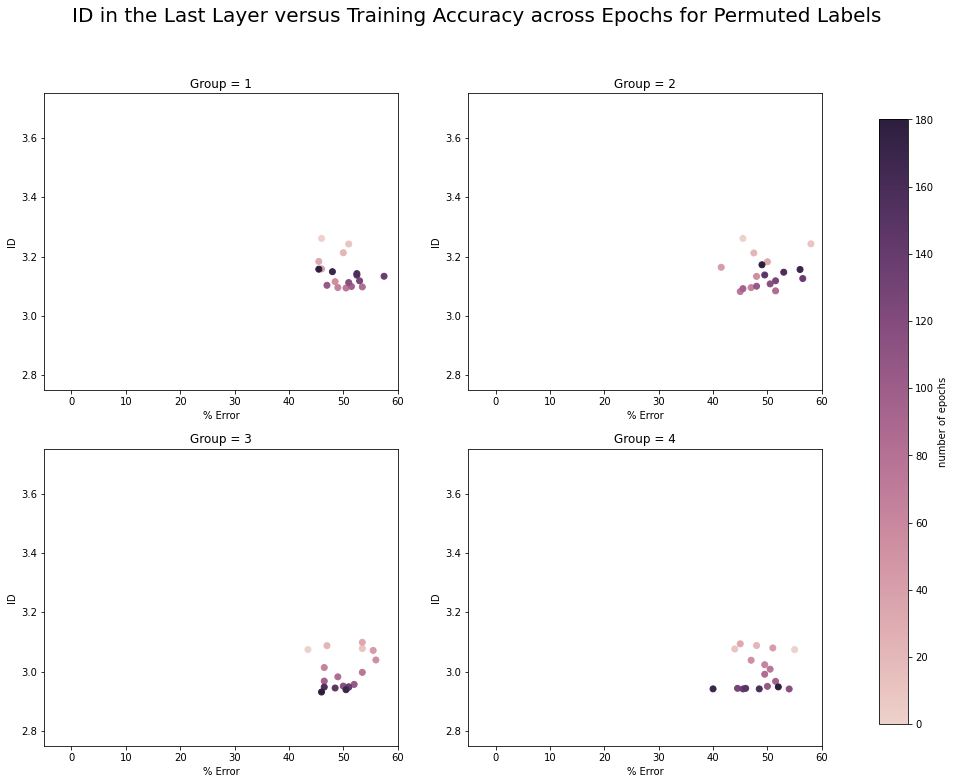

In [22]:
fig, axs = plt.subplots(2, 2, figsize = (2 * 8, 2 * 6))
fig.suptitle('ID in the Last Layer versus Training Accuracy across Epochs for Permuted Labels', fontsize = 20)

for i in range(number_group):
    if i <= 1:
        ax = axs[0, i]
    elif i > 1:
        ax = axs[1, i - 2]
    
    ax.set_title('Group = ' + str(i + 1), fontsize = 12)
    
    ax.set_xlabel('% Error')
    ax.set_xlim((-5, 60))
    
    ax.set_ylabel('ID')
    ax.set_ylim((2.75, 3.75))
    
    n_points = 18
    
    x = np.zeros(n_points)
    for j in range(n_points):
        x[j] = 100 - all_simulation_training_accuracy_permuted.mean(0)[i, 0, 10 * j]
    y = np.nanmean(all_simulation_all_ID_permuted, axis = 0)[i, -1, 0, 1:]
    
    color_idx = np.linspace(0, 1, n_points)
    
    cmap = sns.cubehelix_palette(as_cmap = True)
    points = ax.scatter(x, y, c = color_idx, cmap = cmap)

fig.subplots_adjust(right = 0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
cbar = fig.colorbar(points, cax = cbar_ax)
cbar.set_label('number of epochs')
cbar.set_ticks([0, 2 / 18, 4 / 18, 6 / 18, 8 / 18, 10 / 18, 12 / 18, 14 / 18, 16 / 18, 1])
cbar.set_ticklabels(['0', '20', '40', '60', '80', '100', '120', '140', '160', '180'])